# EE 538: Analog Integrated Circuit Design

## Winter 2021

## Instructor: Jason Silver

## Python packages/modules

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_x2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1, 'b')
    ax.plot(x, y2, 'r')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])    
    
def nmos_iv_sweep(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = []
    
    for i in range(len(V_ds)):
        I_d.append(np.piecewise(V_ds[i], [V_ds[i] < V_ov, V_ds[i] >= V_ov],
                       [u_n*C_ox*(W/Leff)*(V_gs - V_thn - V_ds[i]/2)*V_ds[i]*(1+lmda*V_ds[i]) , 
                        0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds[i])])) 
    
    return np.array(I_d)

def pmos_iv_sweep(V_sg, V_sd, W, L, lmda):
    u_p = 100                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thp = -0.8                # threshold voltage (device parameter)
    V_ov = V_sg - np.abs(V_thp)
    Ldp = 0.09e-6
    Leff = L - 2*Ldp
    
    I_d = []
    
    for i in range(len(V_sd)):
        I_d.append(np.piecewise(V_sd[i], [V_sd[i] < V_ov, V_sd[i] >= V_ov],
                       [u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp) - V_sd[i]/2)*V_sd[i]*(1+lmda*V_sd[i]) , 
                        0.5*u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp))**2*(1+lmda*V_sd[i])])) 
    
    return np.array(I_d)

def nmos_iv_sat(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = 0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds)
    
    return I_d

def nmos_diff_pair(V_id, I_ss, R_D, W, L, V_dd):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_dp = I_ss/2 + 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)
    I_dm = I_ss/2 - 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)

    return I_dp, I_dm

# Lecture 10 - CMOS Technology

## Announcements

 - Design Project Phase 2 posted, due Friday March 19
     - PDF submission on Canvas

## Week 10

 - Chapter 18 of Razavi (CMOS Procesing Technology)
 - Chapter 19 of Razavi (Layout and Packaging)

## Overview

 - Last time...
     - Miller compensation of 2-stage OTAs
     - Ahuja compensation
     - Gain-boosted structures
 - Today...
     - Process design rules
     - MOS transistor layout
     - Matching techniques
     - Digital/analog isolation

## MOS transistor fabrication

 - Masks are created using photolithography for each layer and the chip is constructed layer by layer
 
 - Source, drain and substrate/well “ties” are created via ion implantation 
 
 - $SiO_2$ is “grown” by placing exposed silicon in an oxidizing environment at a high temperature (1000 C) 
 
 - Circuit connectivity is realized aluminum "wires" and contacts between vertically-stacked layers of the chip
 
 - Metal  and poly layers are deposited via deposition (e.g. CVD), where wafers are put in a furnace filled with a gas containing the desired  material

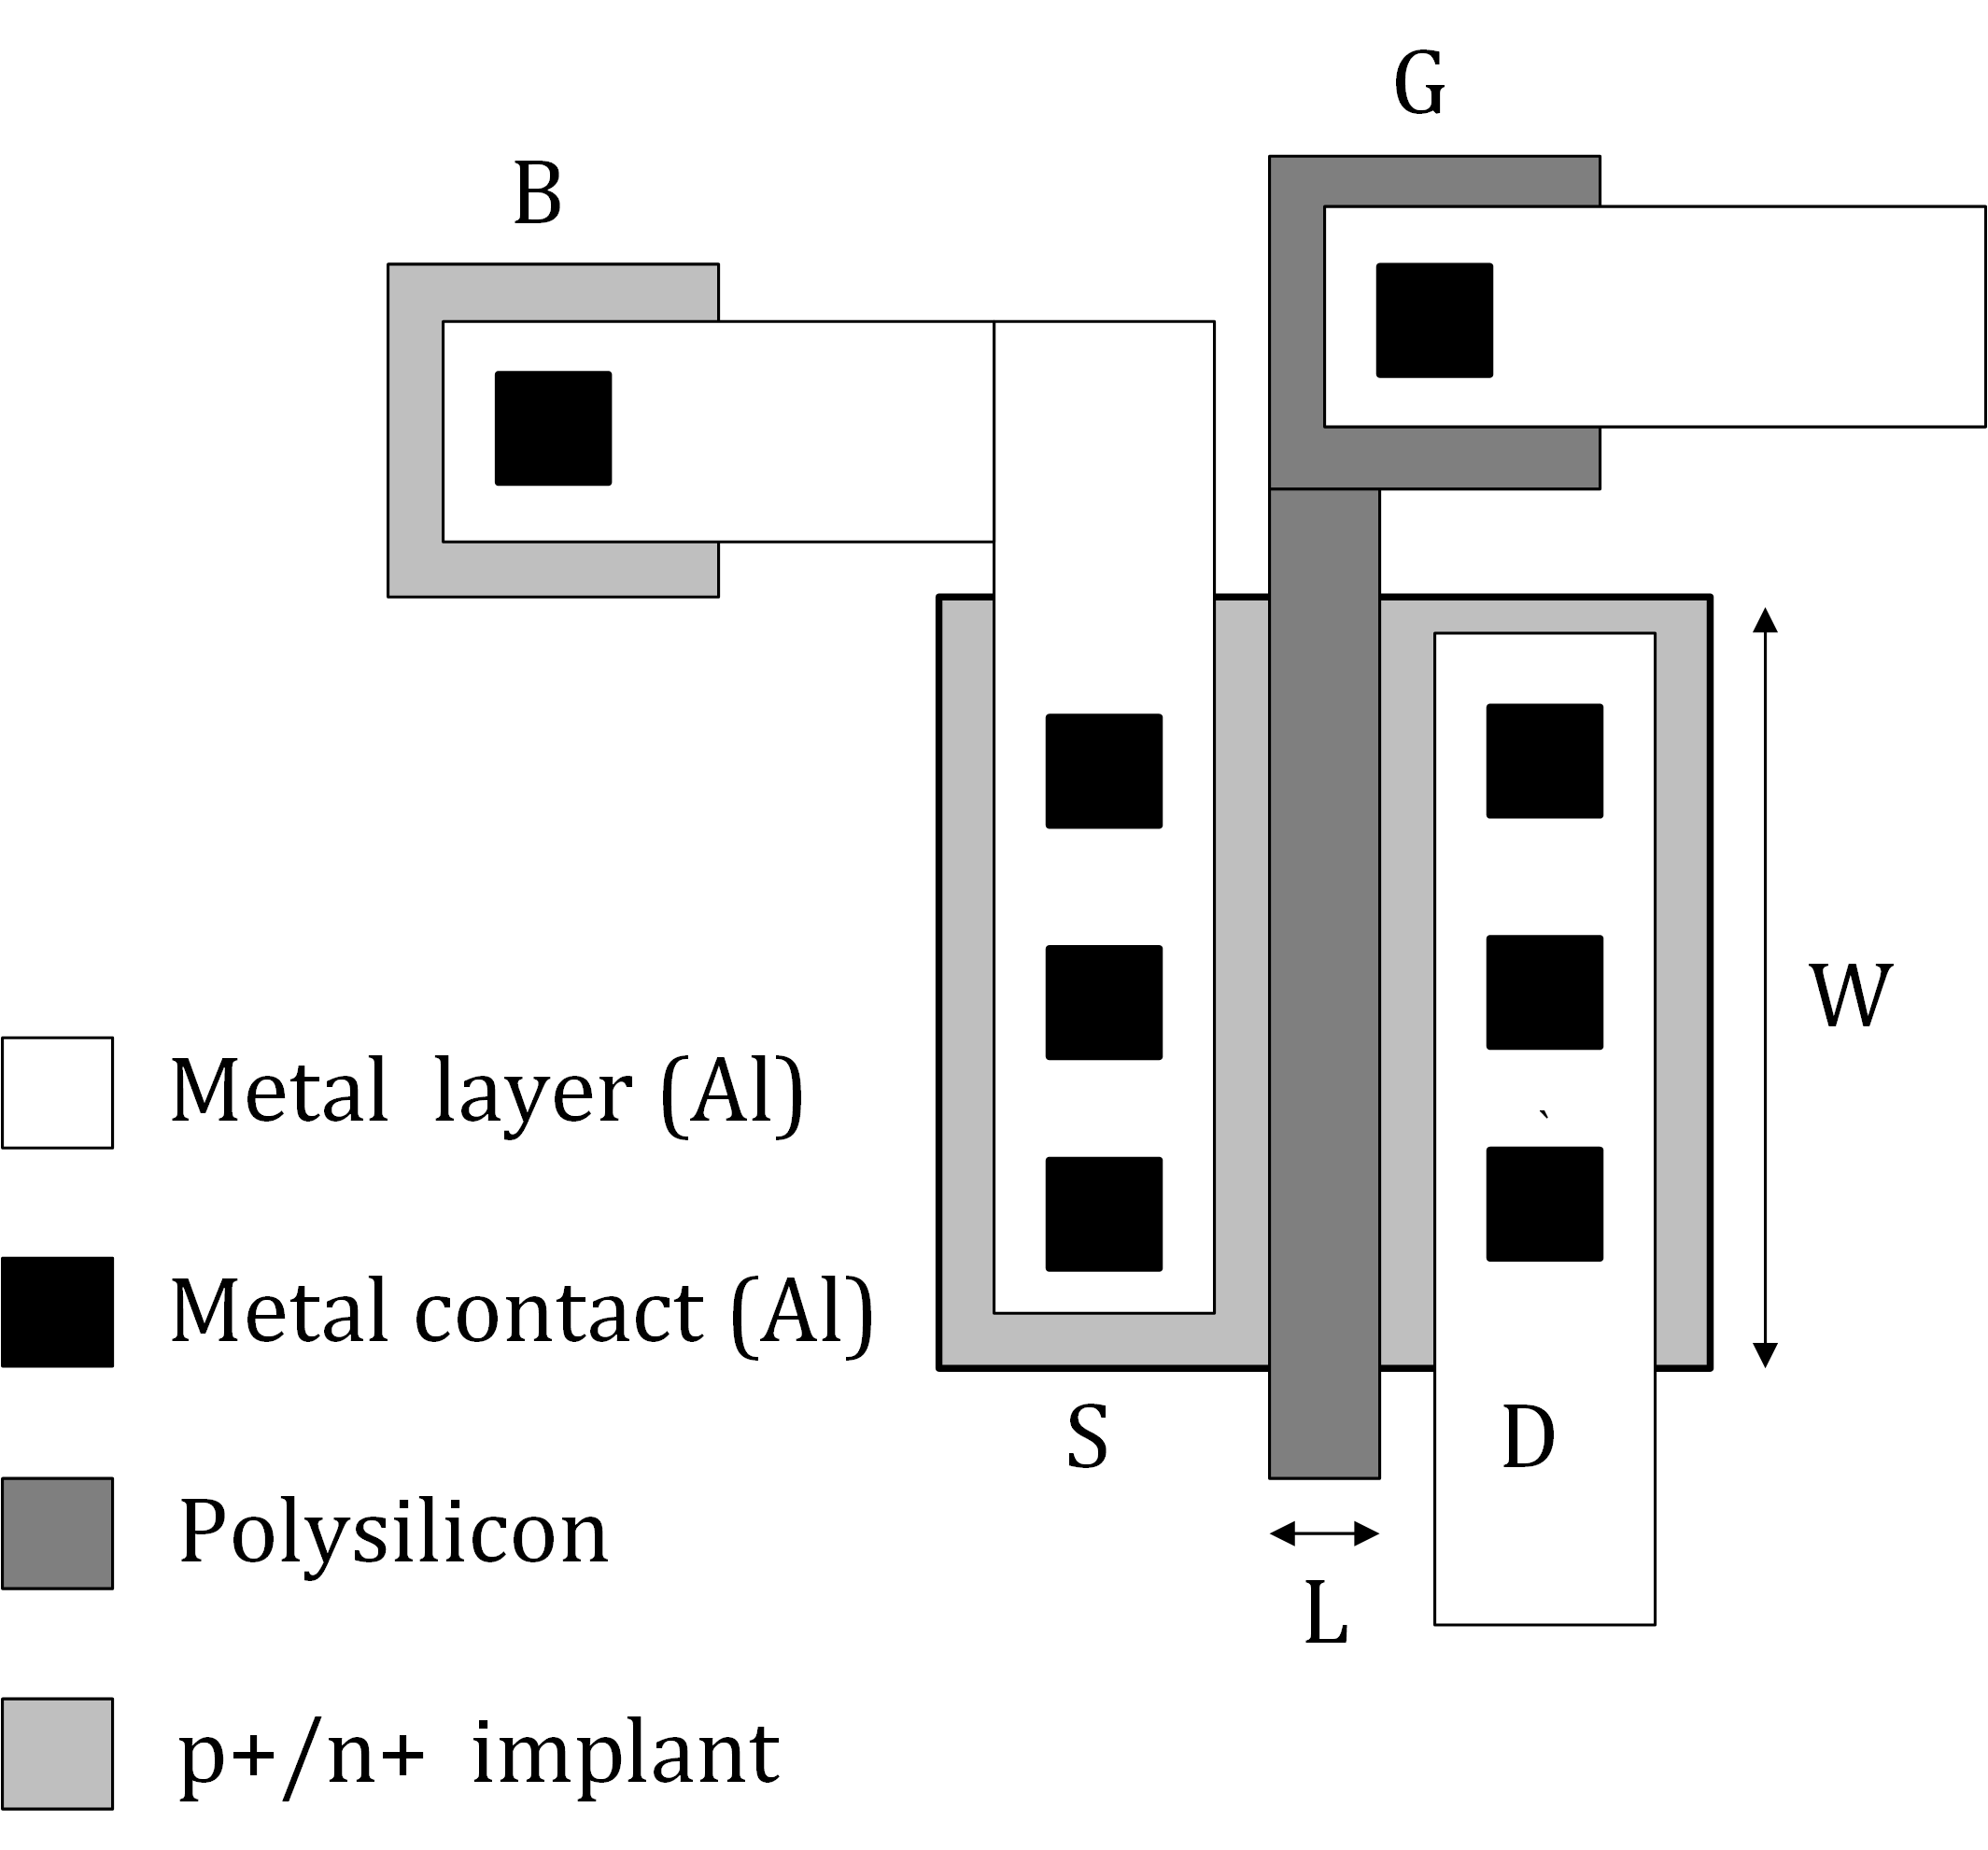

## MOS design rules

 - Minimum device $L$ is a limitation of a given process technology, typically indicated by the process node name (e.g. 40nm)
 
 - The minimum value of $L$ is a photolithography limitation, and has historically been halved every 18 months or so (Moore’s Law)
 
 - Recently, however, Moore's Law has been slowing down, forcing foundries and designers to invent other ways of improving performance (e.g. parallelization) 

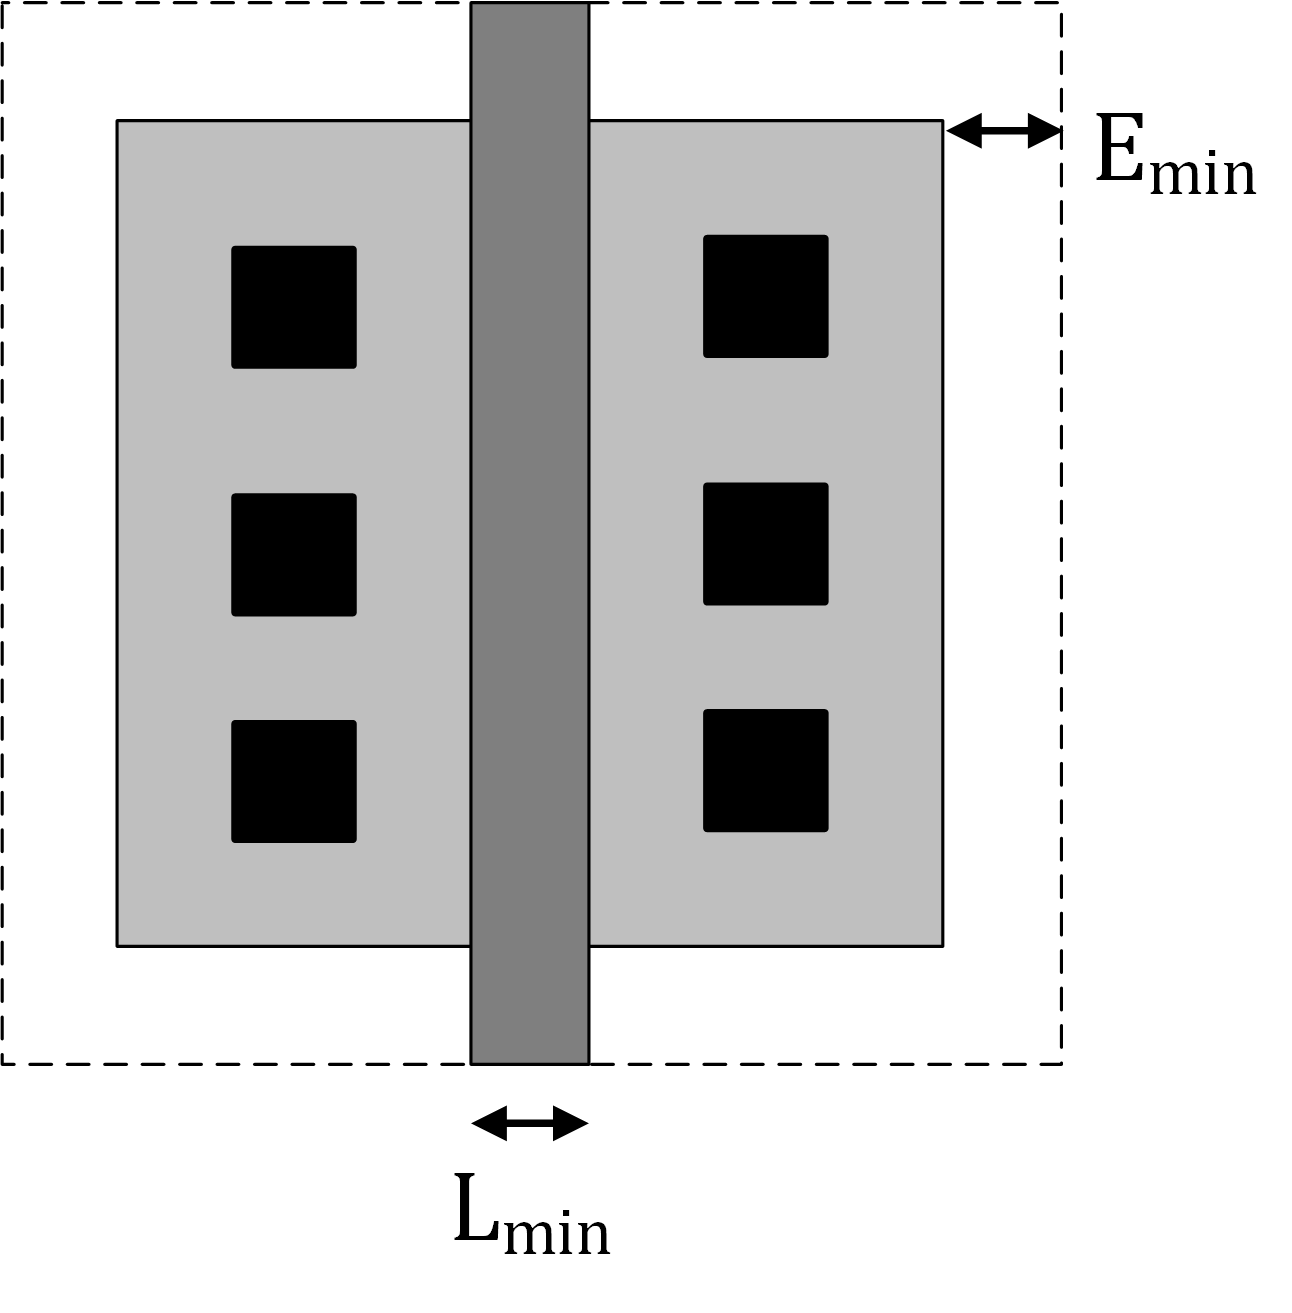

## MOS transit frequency

 - The utility of the MOS transistor as a gain device depends on its capacity to delivery current to a load (with gain)
 
 - That is, to achieve gain (in terms of power, rather than voltage) the output current should be higher than the input current
 
 - The frequency at which the input current magnitude becomes equal to that of output current is called the transit frequency ($f_T$)

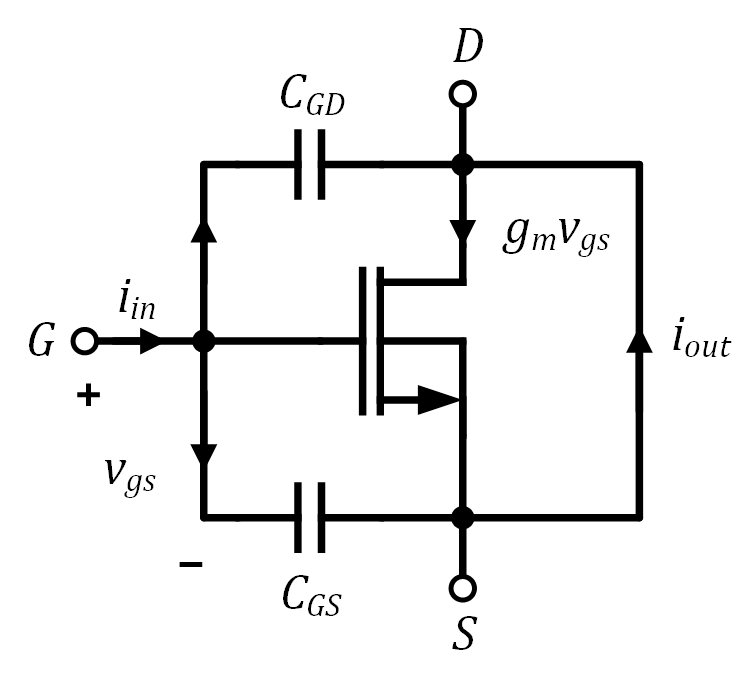

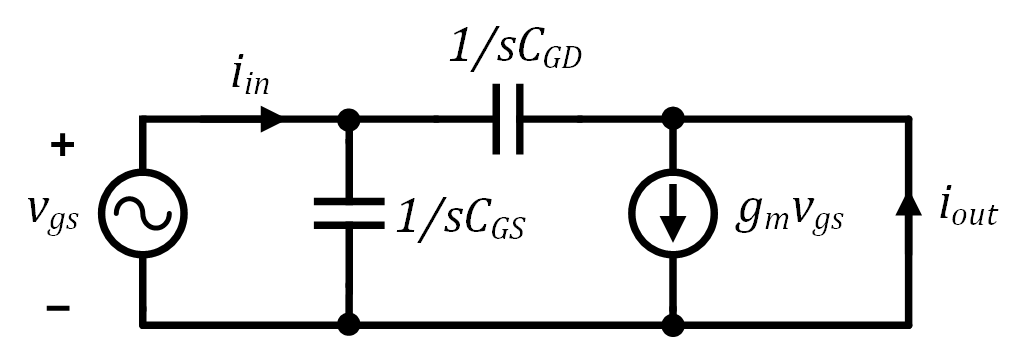

\begin{equation}
i_{in} = v_{gs}(sC_{GS}+sC_{GD}) 
\end{equation}   
    
\begin{equation}
i_{out} = g_m v_{gs}
\end{equation}   

 - At the transit frequency, the input and output current magnitudes are equal

\begin{align}
i_{out} &= |i_{in}(f_T)|\\
\\
g_m v_{gs} &= v_{gs}\cdot 2\pi f_T \cdot (C_{GS} + C_{GD}) 
\end{align}

 - This results in $f_T$ given by
 
\begin{equation}
\boxed{ f_T = \dfrac{g_m}{2\pi \cdot (C_{GS} + C_{GD})} }
\end{equation}

 - $f_T$ is limited by mobility, threshold
voltage, $V_{GS}$, and $L$

 - $\mu$ is carrier-dependent (electrons, holes), while $V_{th}$ and $L$ are process-dependent
 
 - The limit of $V_{GS}$ is (typically) $V_{DD}$, setting an upper bound on device speed for a given process technology
 
 - The scaling of $L$ via Moore's Law has allowed a consistent improvement in performance for decades, but this is slowing due to manufacturing technology limitations

\begin{align}
f_T &= \dfrac{g_m}{2\pi \cdot (C_{GS} + C_{GD})} \\
\\
&= \dfrac{\mu C_{ox} \left(\dfrac{W}{L}\right)(V_{GS} - V_{th})}{2\pi (C_{GS} + C_{GD}) } \\
\\
&\approx \dfrac{\mu C_{ox} \left(\dfrac{W}{L}\right)(V_{GS} - V_{th})}{2\pi \cdot 2/3 \cdot WL C_{ox} } \\
\\
&= \boxed{ \dfrac{3}{2}\dfrac{\mu\cdot (V_{GS}-V_{th})}{2\pi L^2} }
\end{align}



## Metal routing design rules

 - Each design layer has associated minimum values for width ($W_{min1,2}$) and spacing ($S_{1,2}$) between different objects on the same layer
 
 - When connecting between layers using a contact, a minimum value of overlap ($OV_{1,2}$) is required to ensure a reliable connection is made
 
 - Minimum values depend on fabrication tolerances, and rule violation can result in shorts between wires or breaks in a conductive path (or very high local resistance)


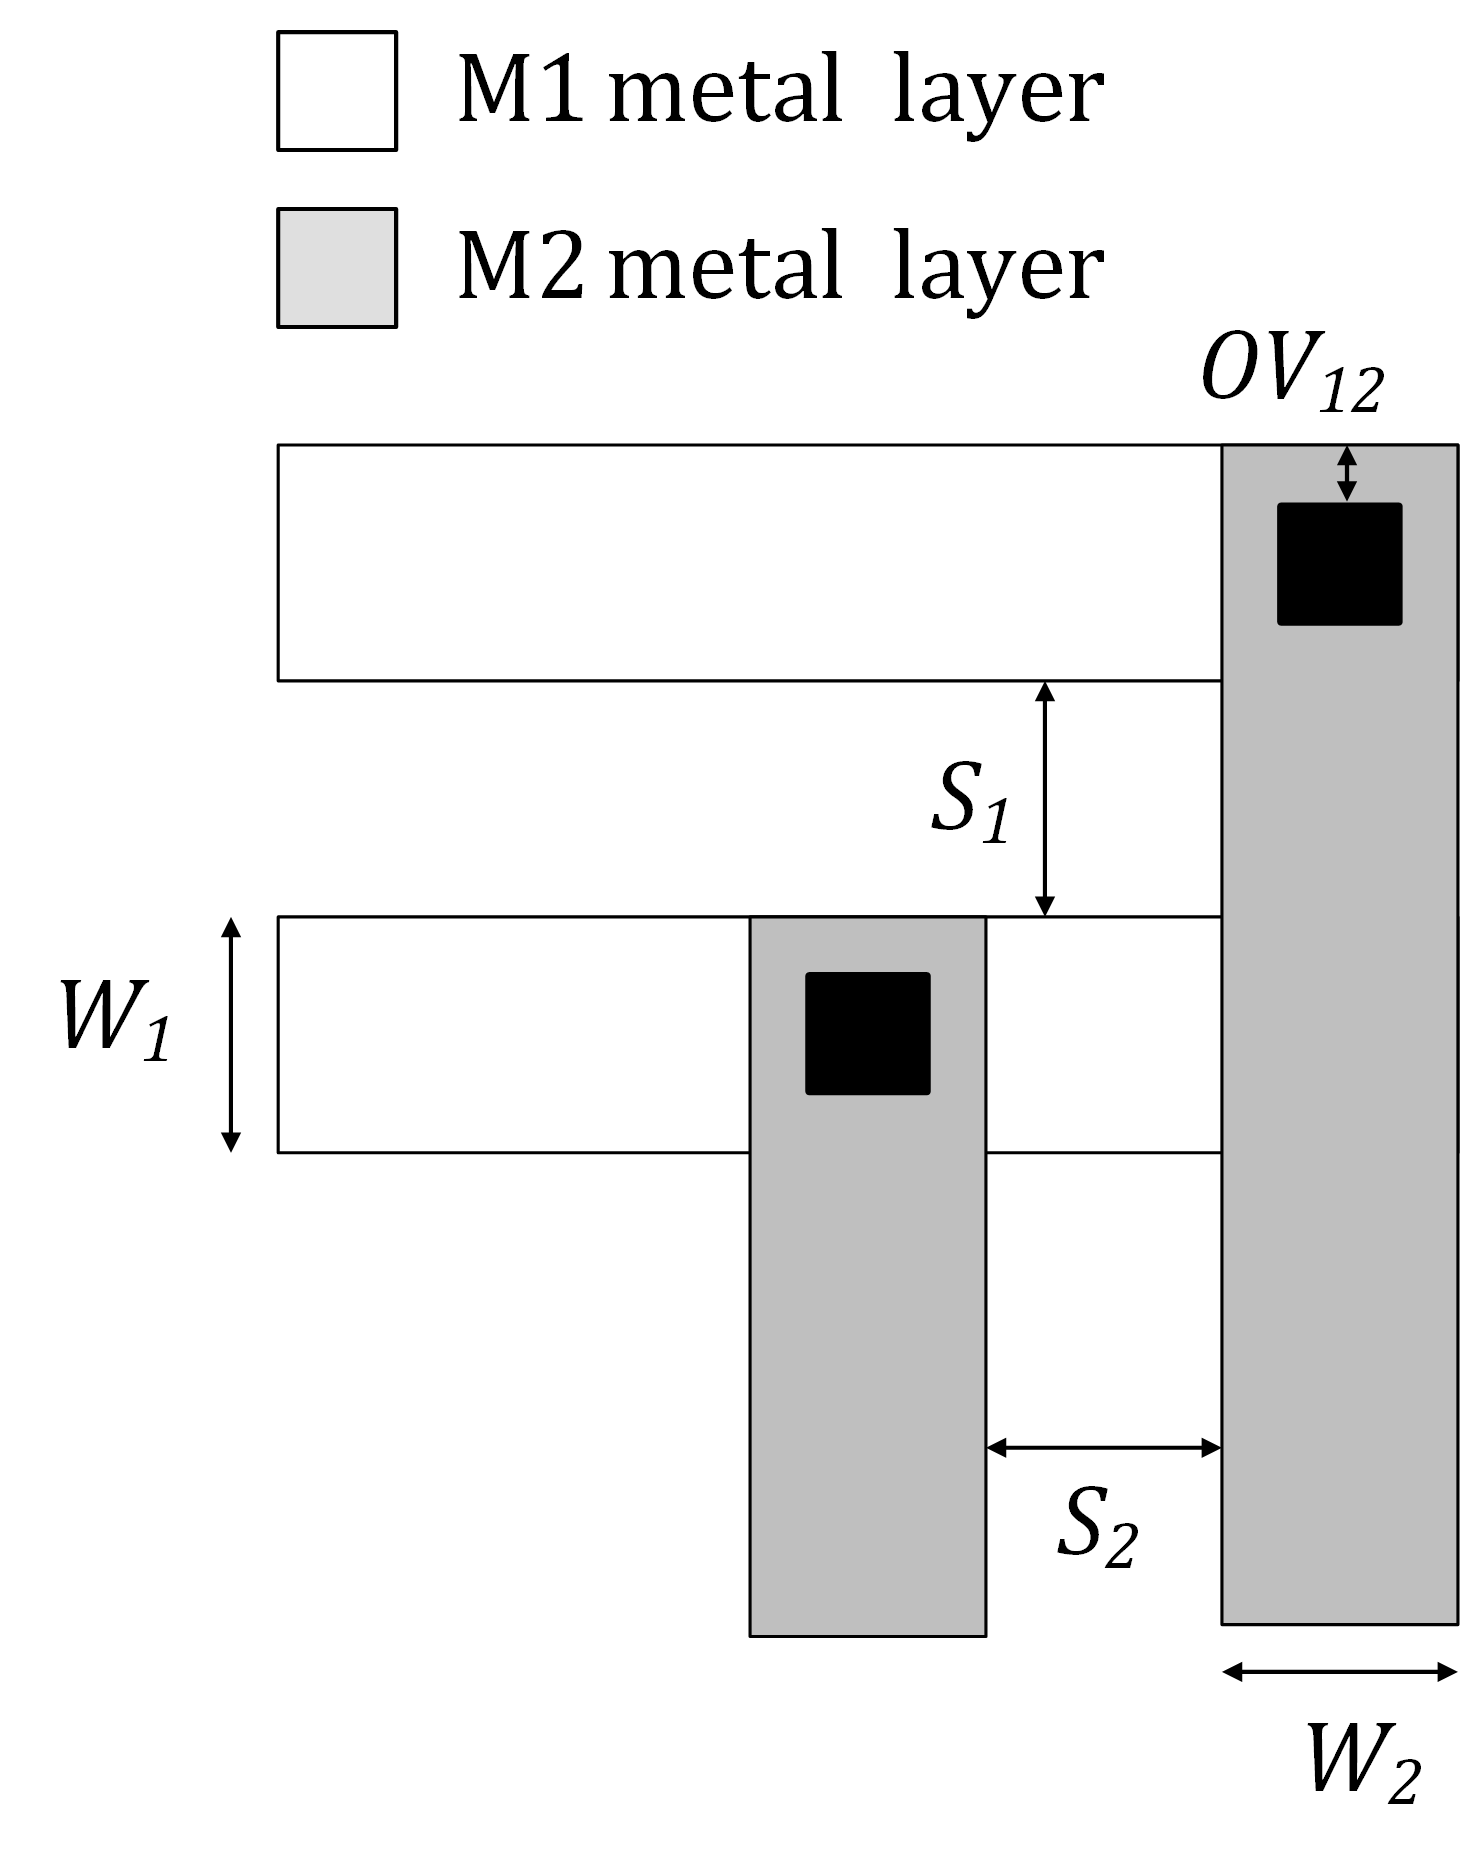

## Polysilicon resistors

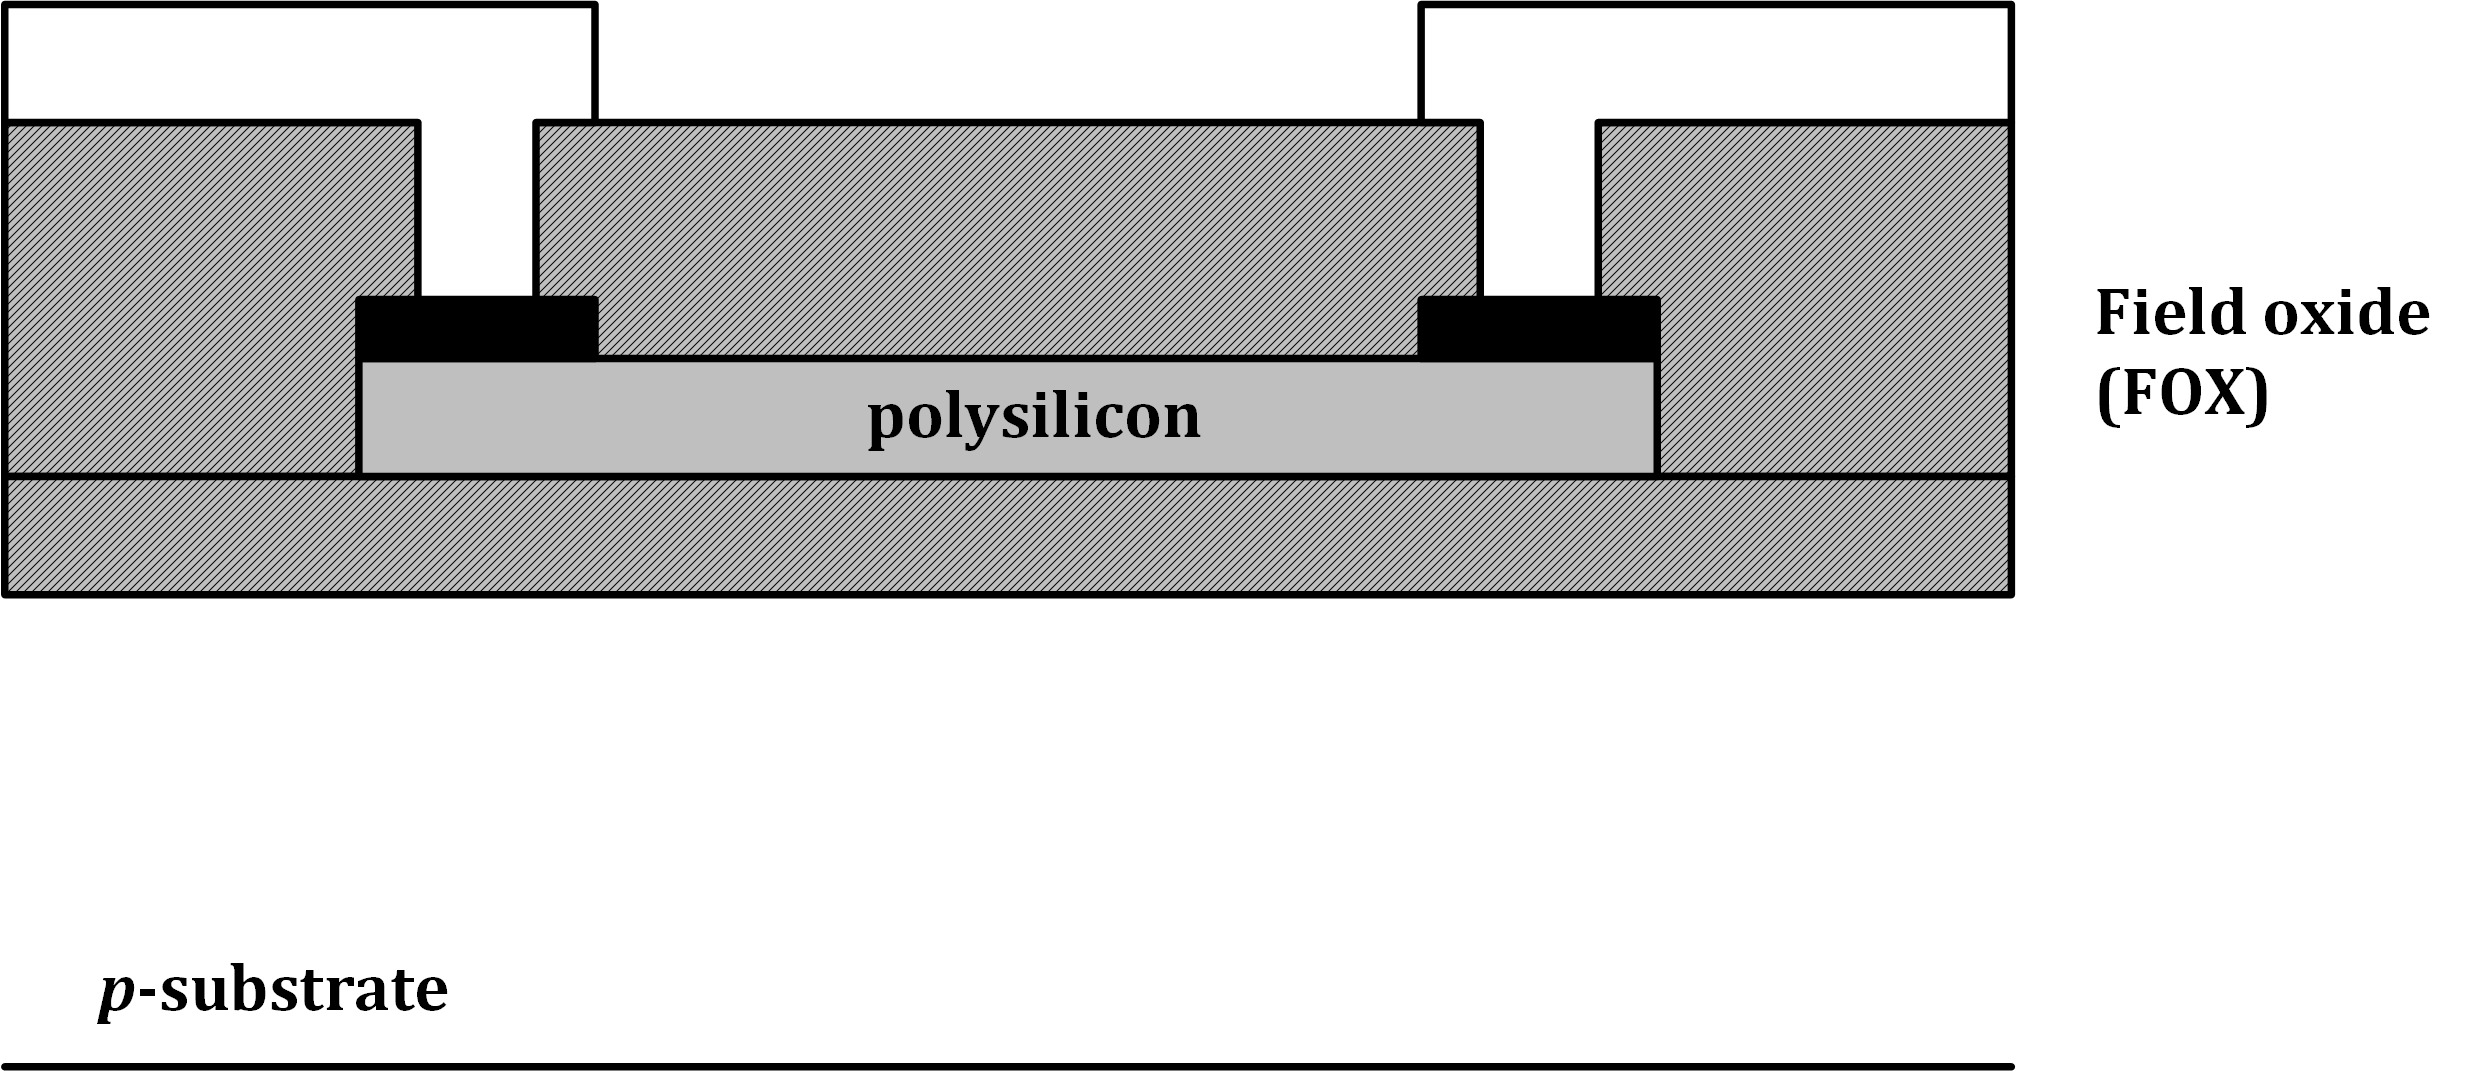

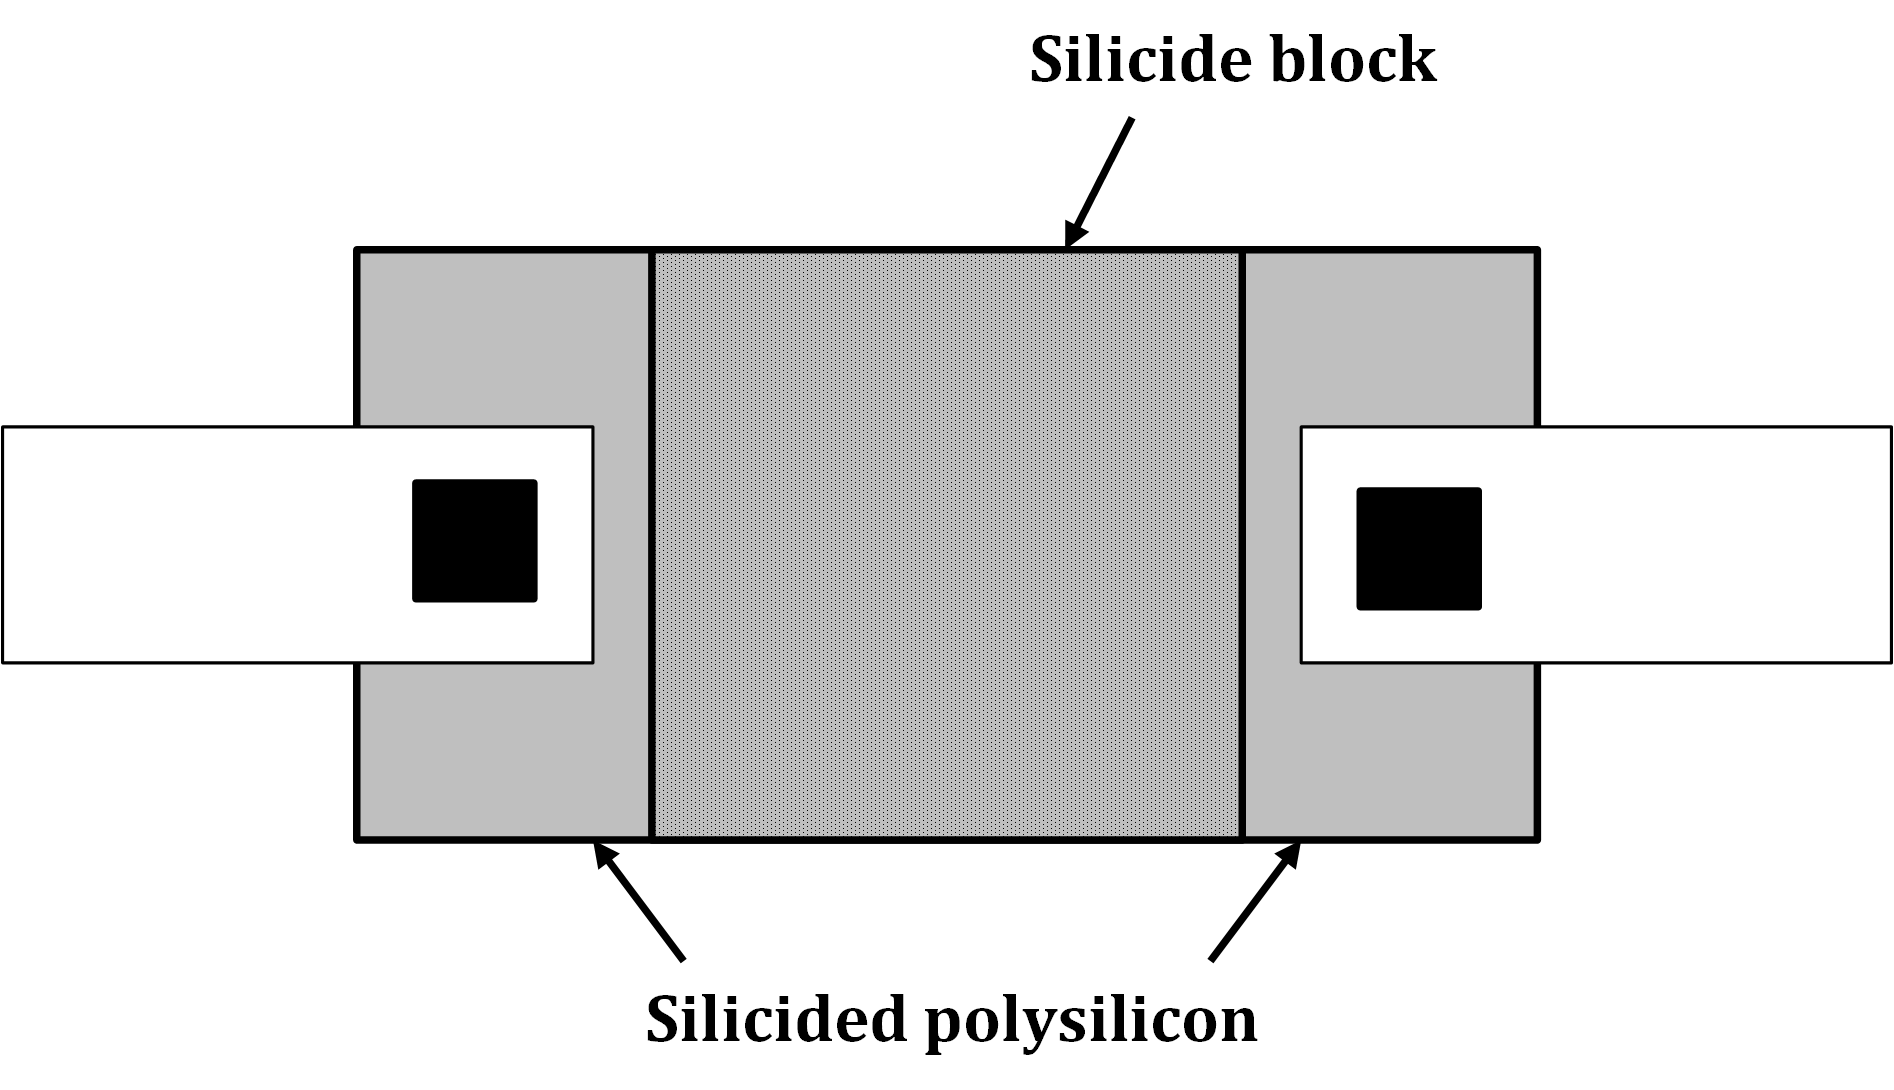

 - High resistance values can be achieved by selectively blocking the silicide layer that is deposited on top of polysilicon for MOS gates
 
 - Resistance values typically fall in the range of fifty to a few hundred $\Omega / \square$ (pronunced "ohms per square"), and are somewhat variable ($\pm 20\%$)
 
 - Due to this variability, precision designs must rely on trimming (e.g. through post-processing) or the use of resistance ratios (as in opamp feedback networks)

## Metal-insulator-metal (MIM) capacitors

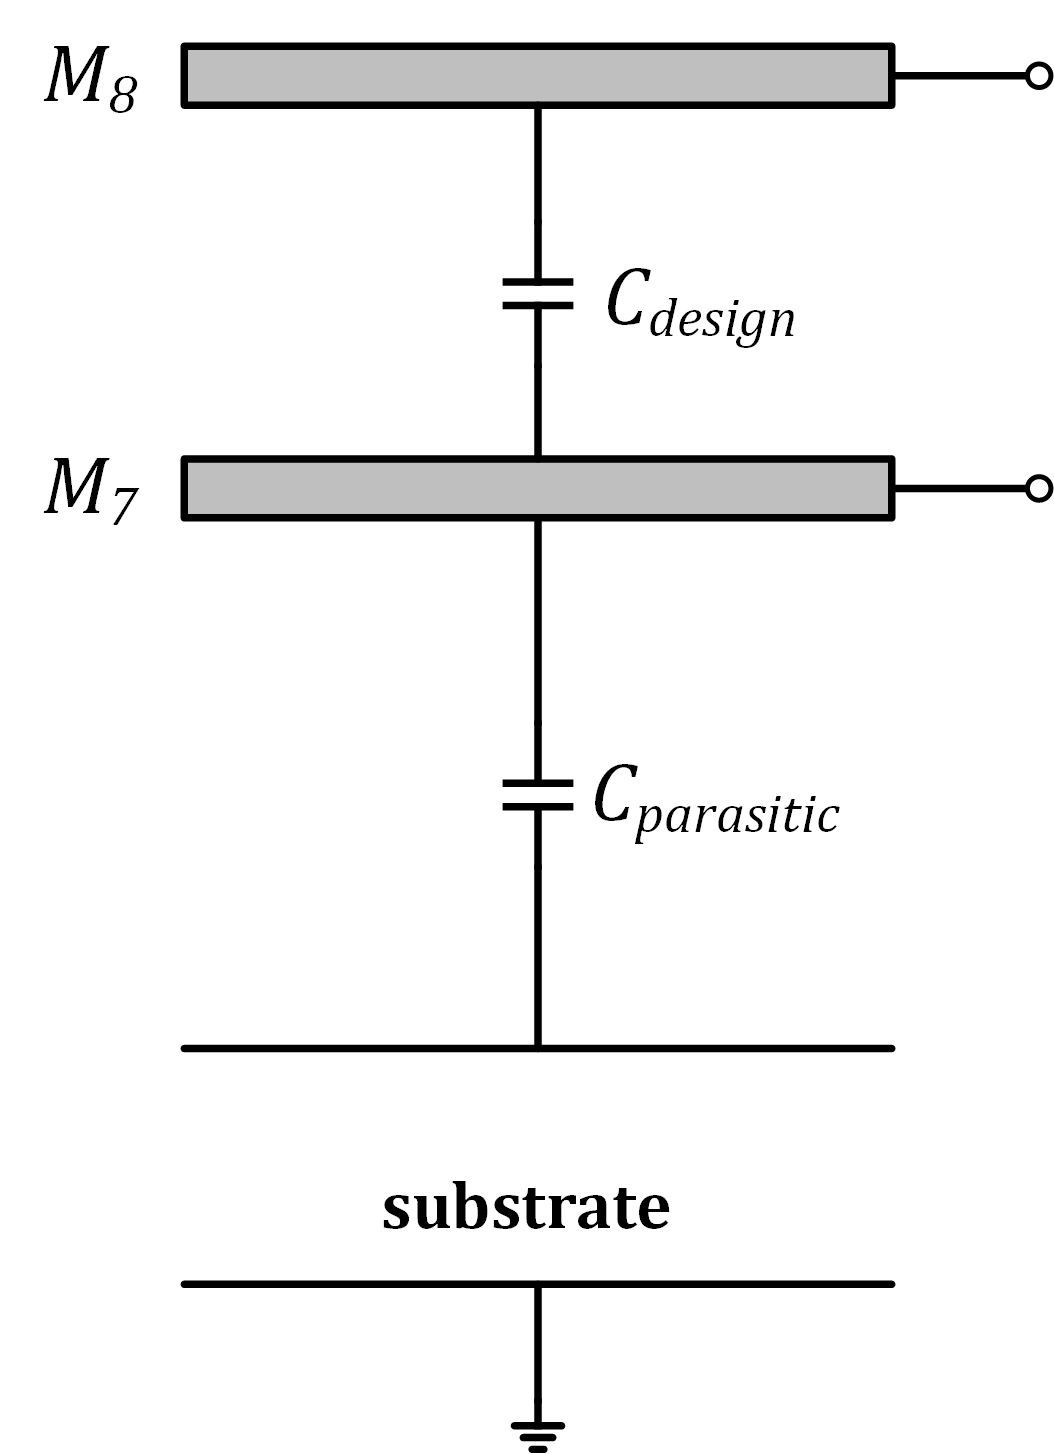

 - Linear capacitors can be formed using the insulating material between metal layers
 
 - Such capacitors are effectively "parallel-plate" capacitors, with capacitance determined by the overlapping area of the metal layers ($M_7$ and $M_8$, in the figure) and the distance bewteen them ($C = \epsilon A/d$)
 
 - MIM capacitors are often constructed using metal layers that are distant from the substrate to avoid significant "parasitic" capacitance between the bottom plate and ground
 

## Gate resistance

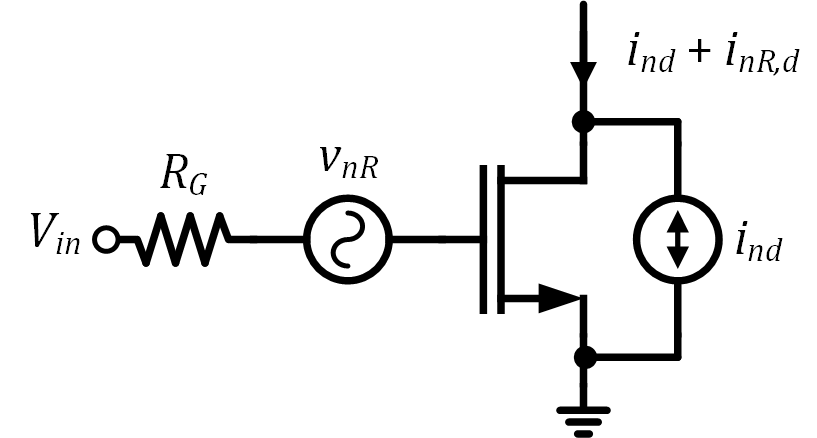

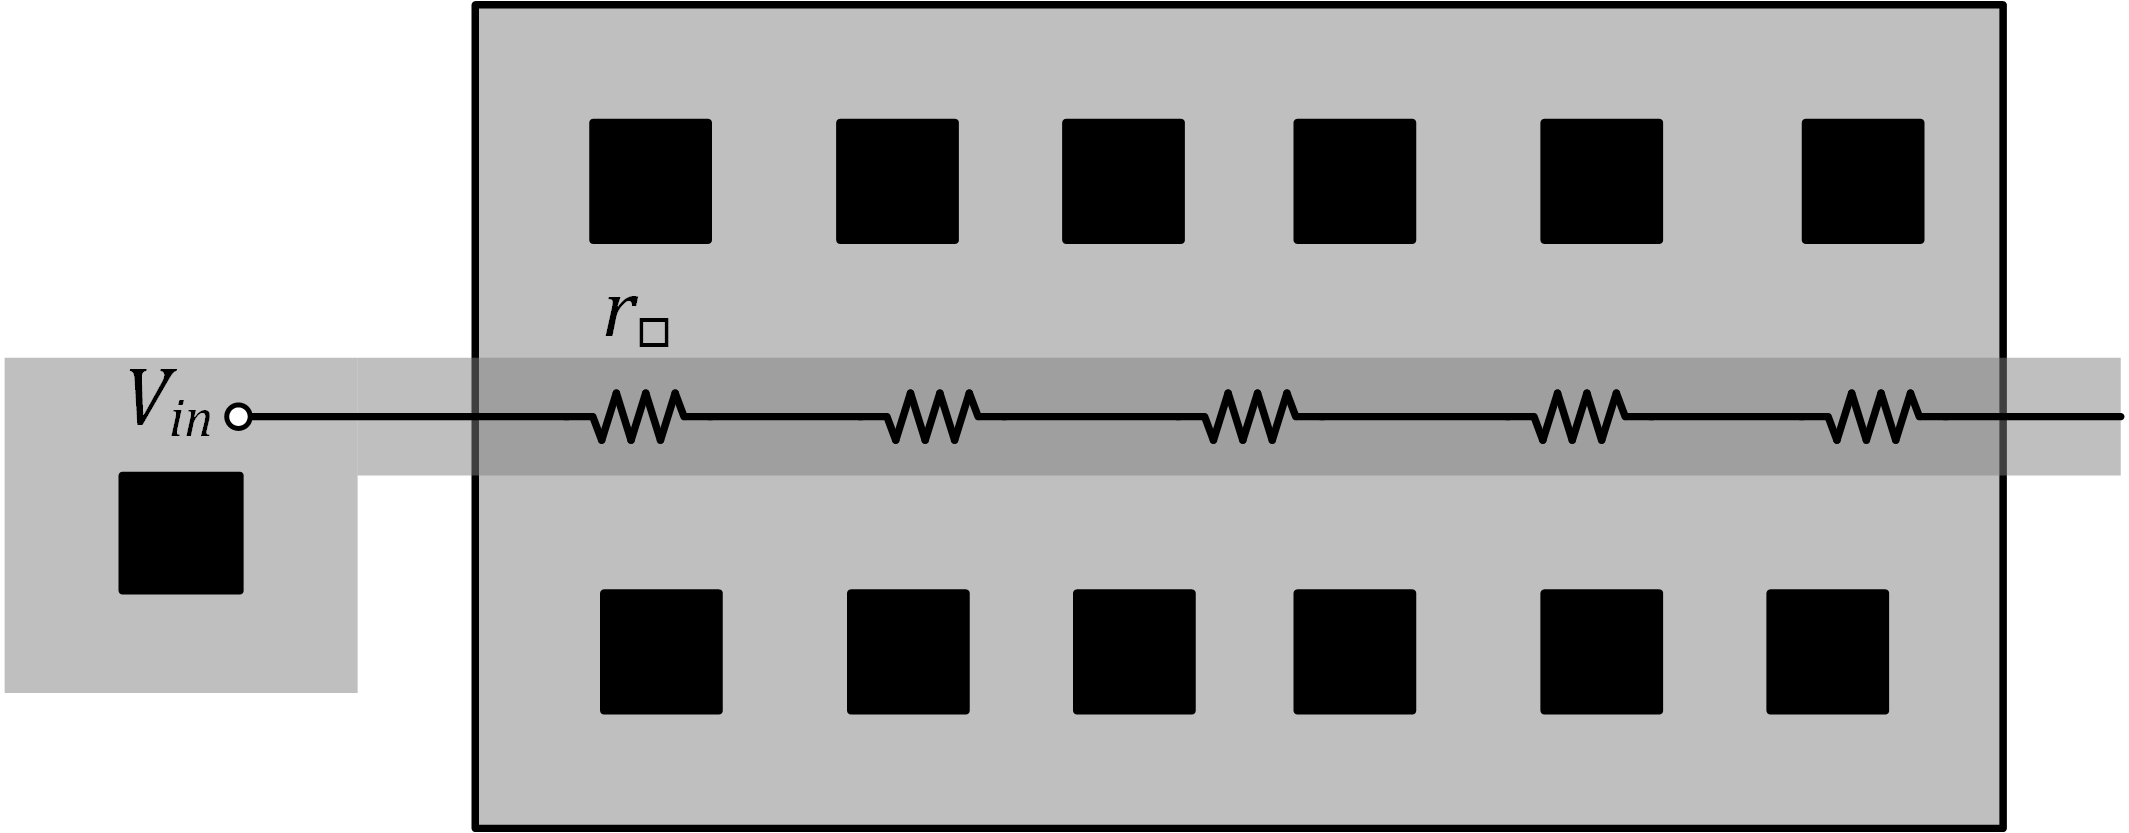

 - The resistance of the polysilicon gate, expressed in $\Omega / \square$, contributes to drain current noise through the device $g_m$

 - For devices with large $W$ (required for high values of $g_m$), the gate noise can contribute significantly to the drain current noise
 
 - Transistor layout should be performed as to minimize gate resistance

## Multi-finger transistors

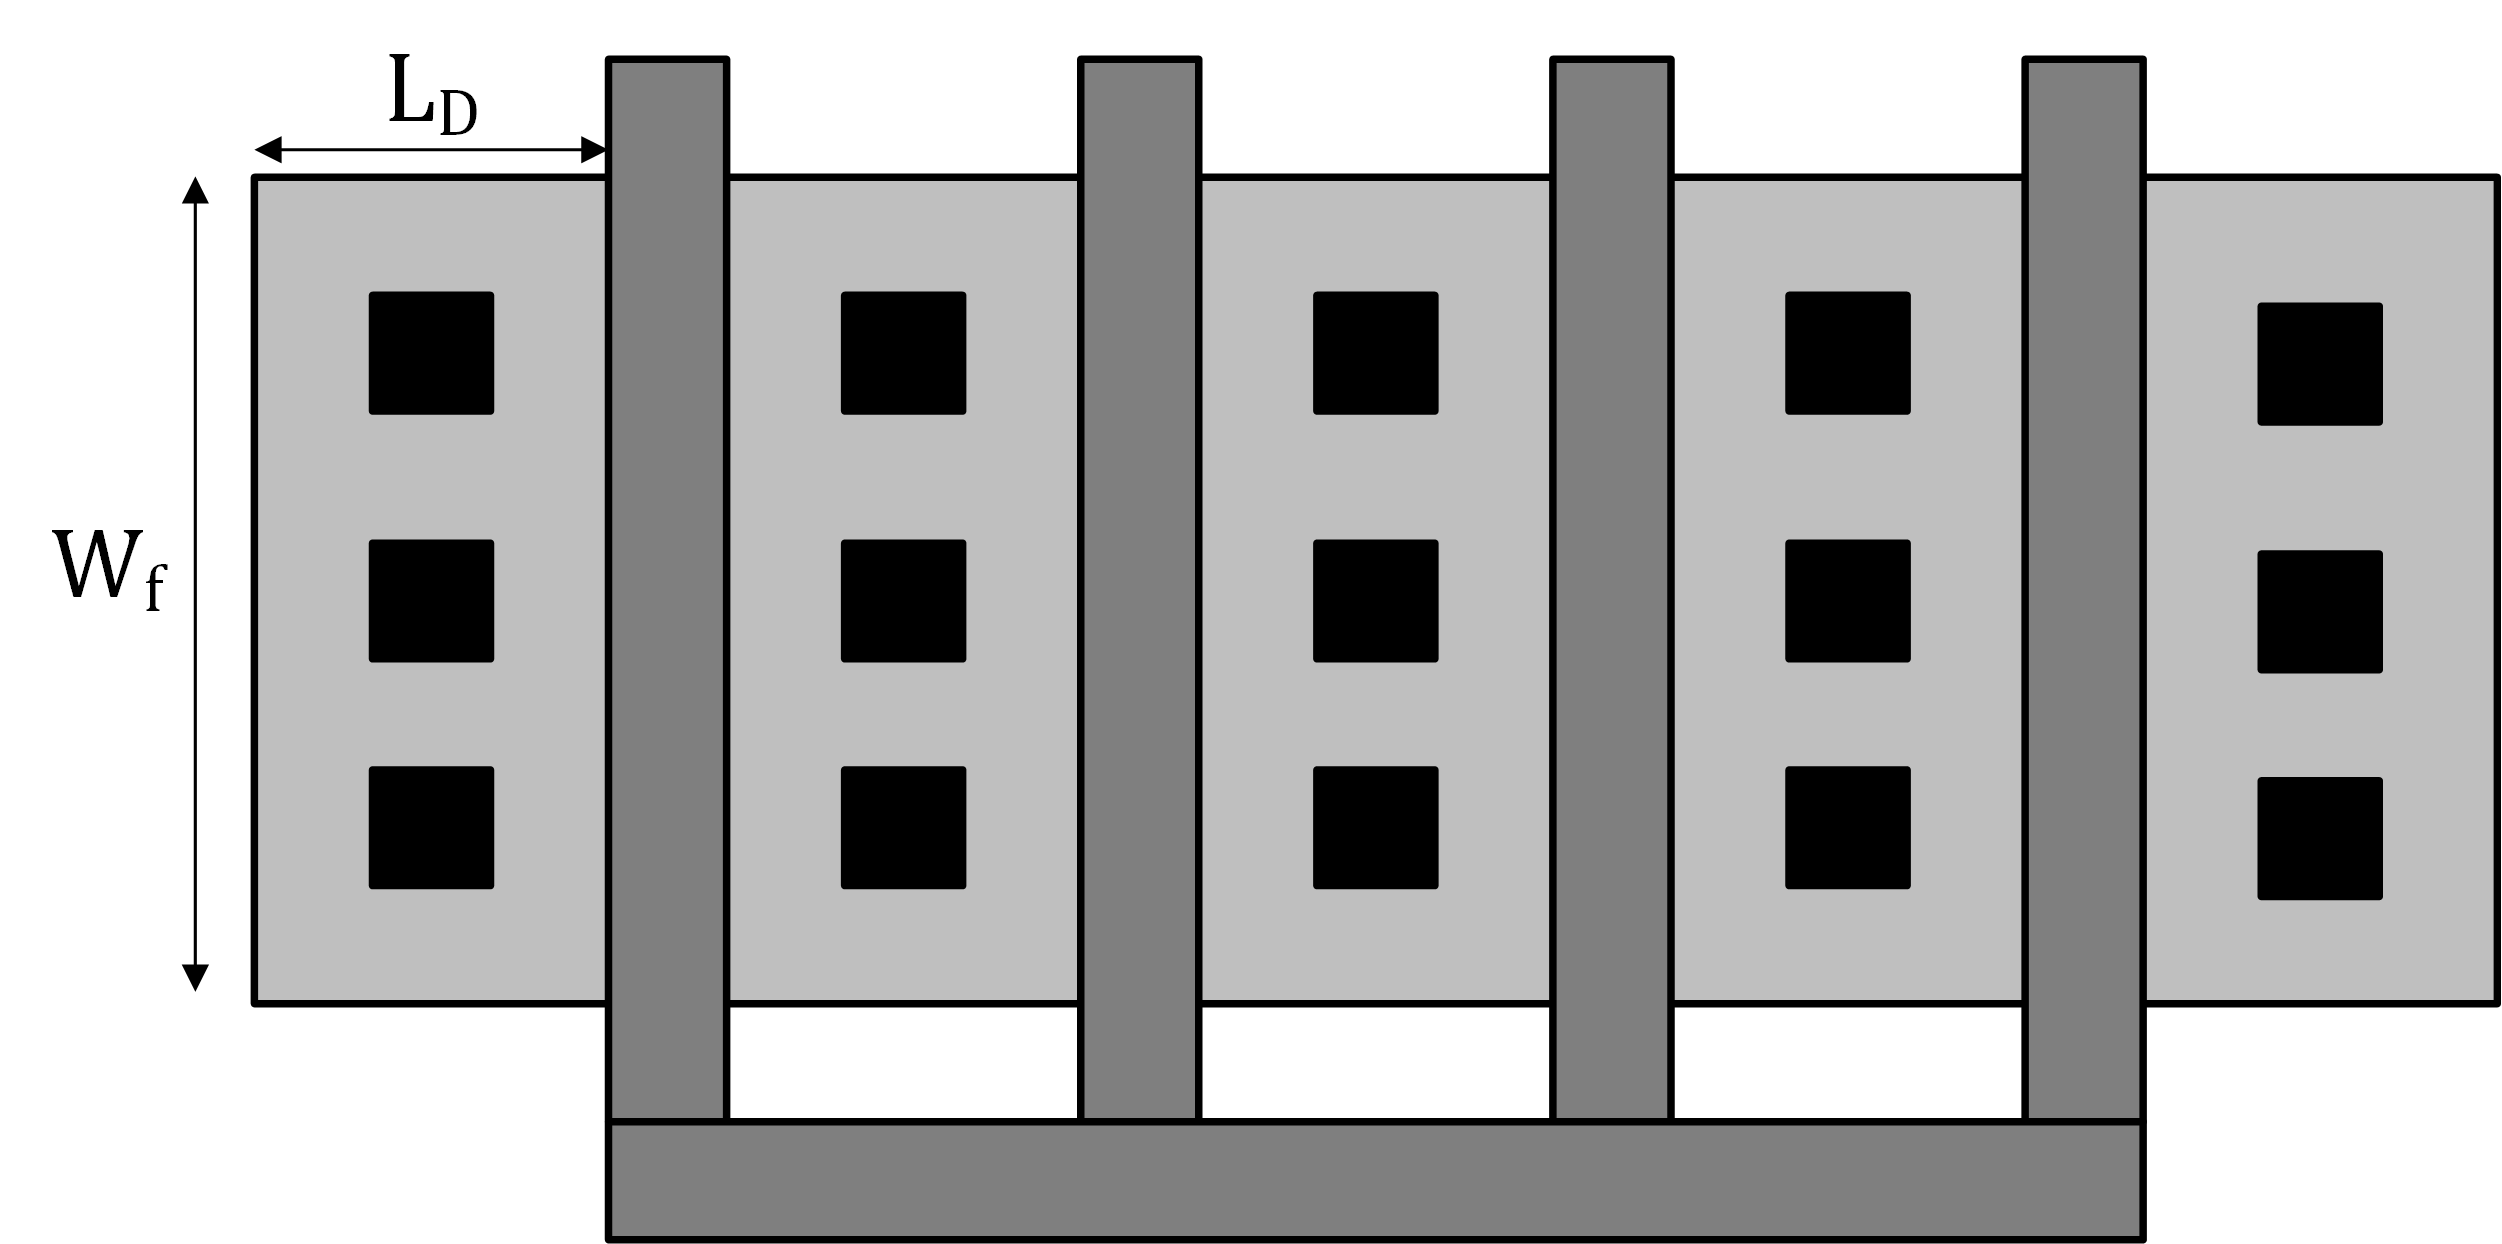

 - Connecting multiple transistor “fingers” in parallel reduces the total gate resistance and noise, in addition to creating a more manageable aspect ratio for different geometry constraints 
 
 - The use of multi-fingered devices also makes $W/L$ ratios between related devices  (e.g. in a current mirror) easy to realize
 
 - However, this results in additional parasitic capacitance due to the larger perimeter of the source and drain regions

## Parallel MOS devices

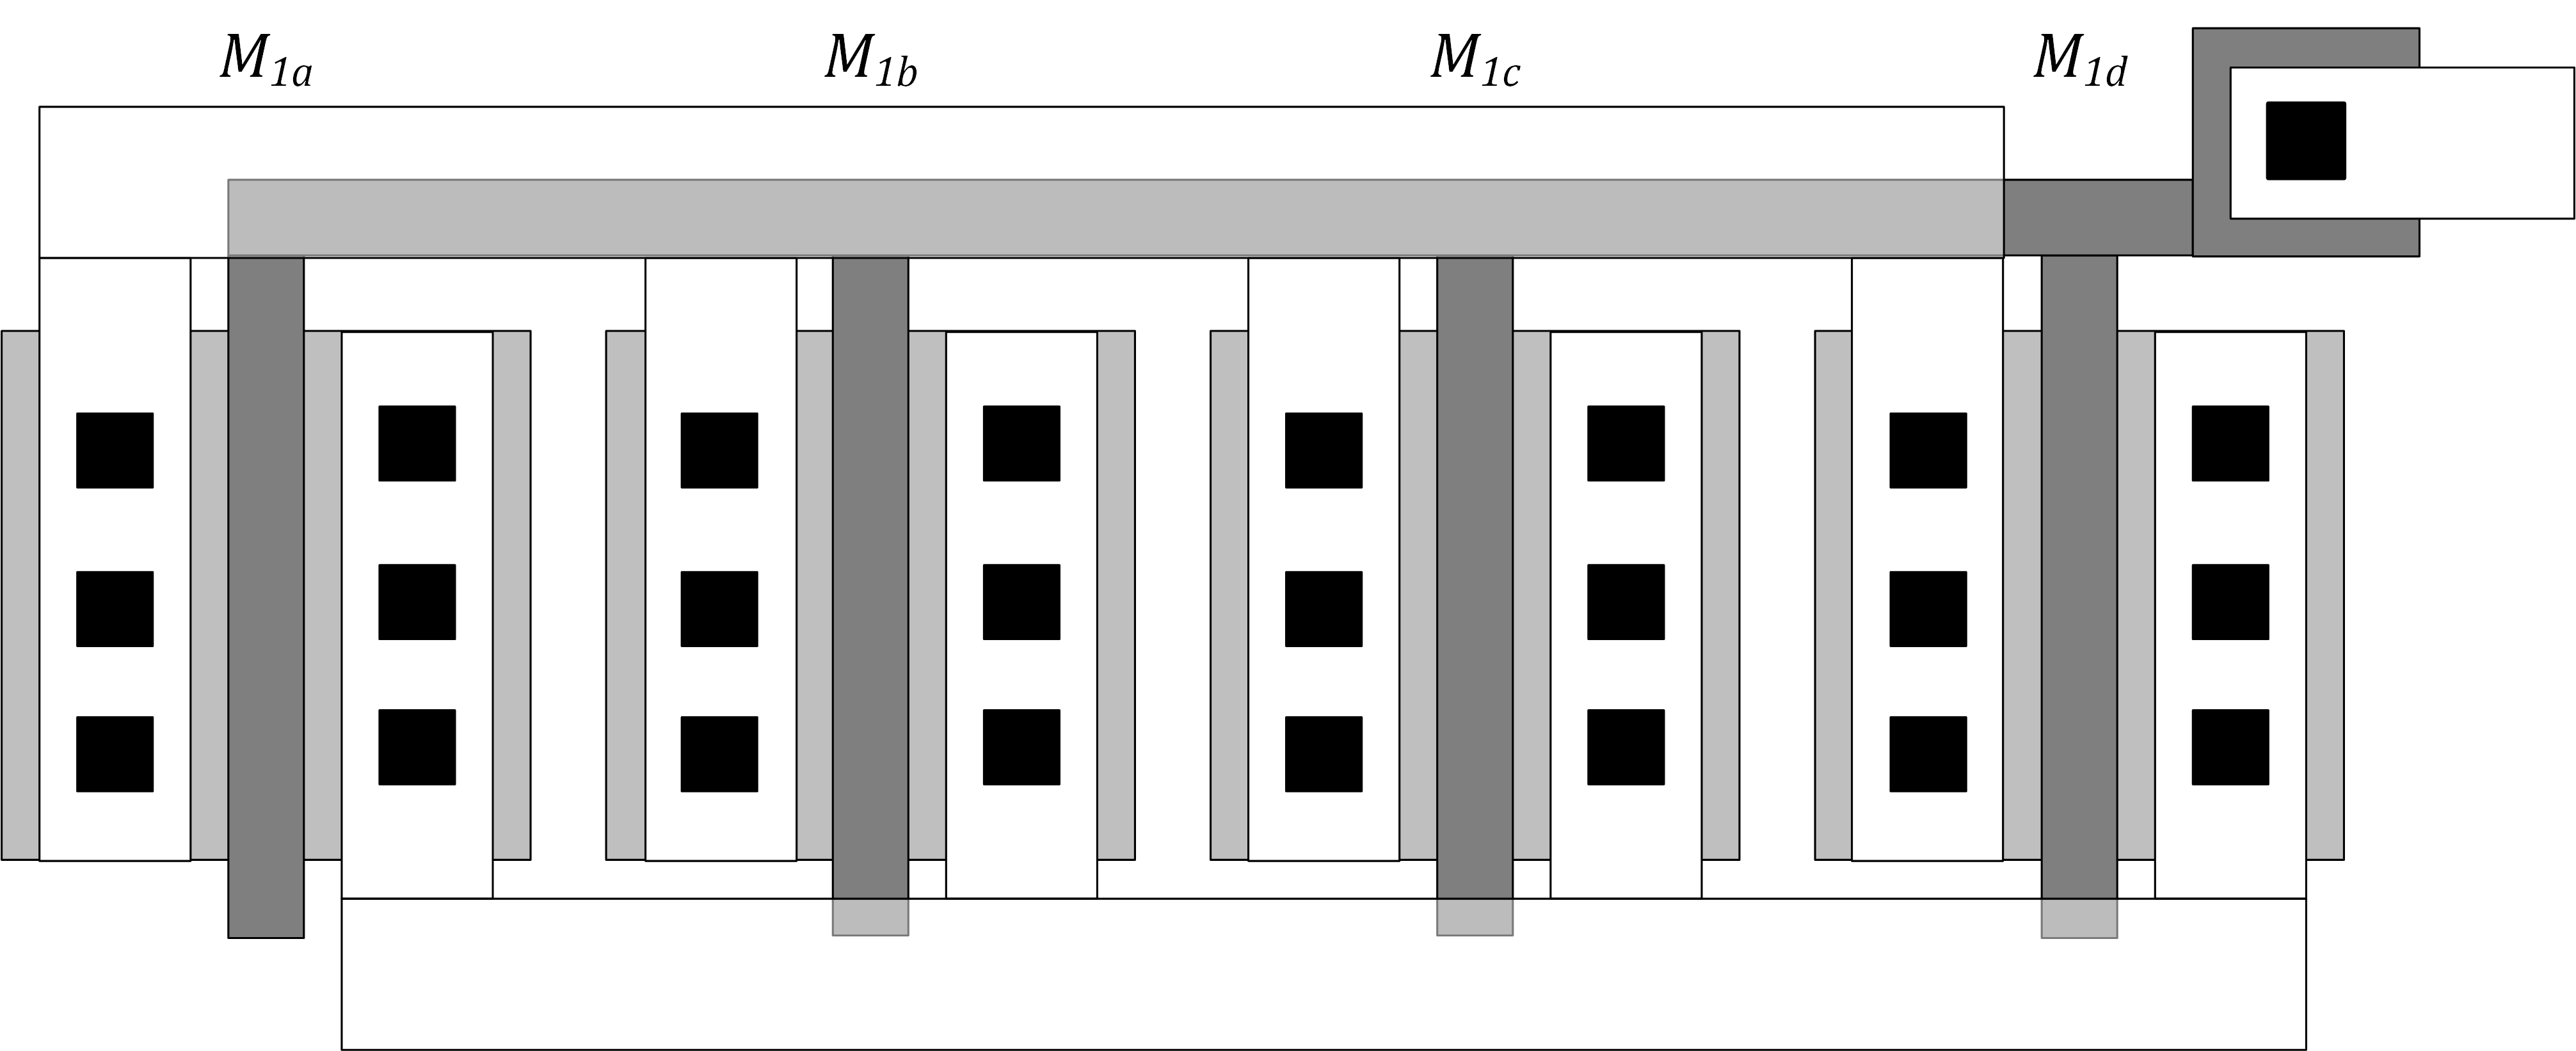

 - Transistors may also be formed as multiple parallel devices, connecting the source and drain regions on M1 and the poly gates directly with additional polysilicon
 
 - Less area-efficient and contributes more parasitic capacitance (due to the increased well perimeter), but useful for certain layout schemes and matching in the face of process gradients

## Process gradients

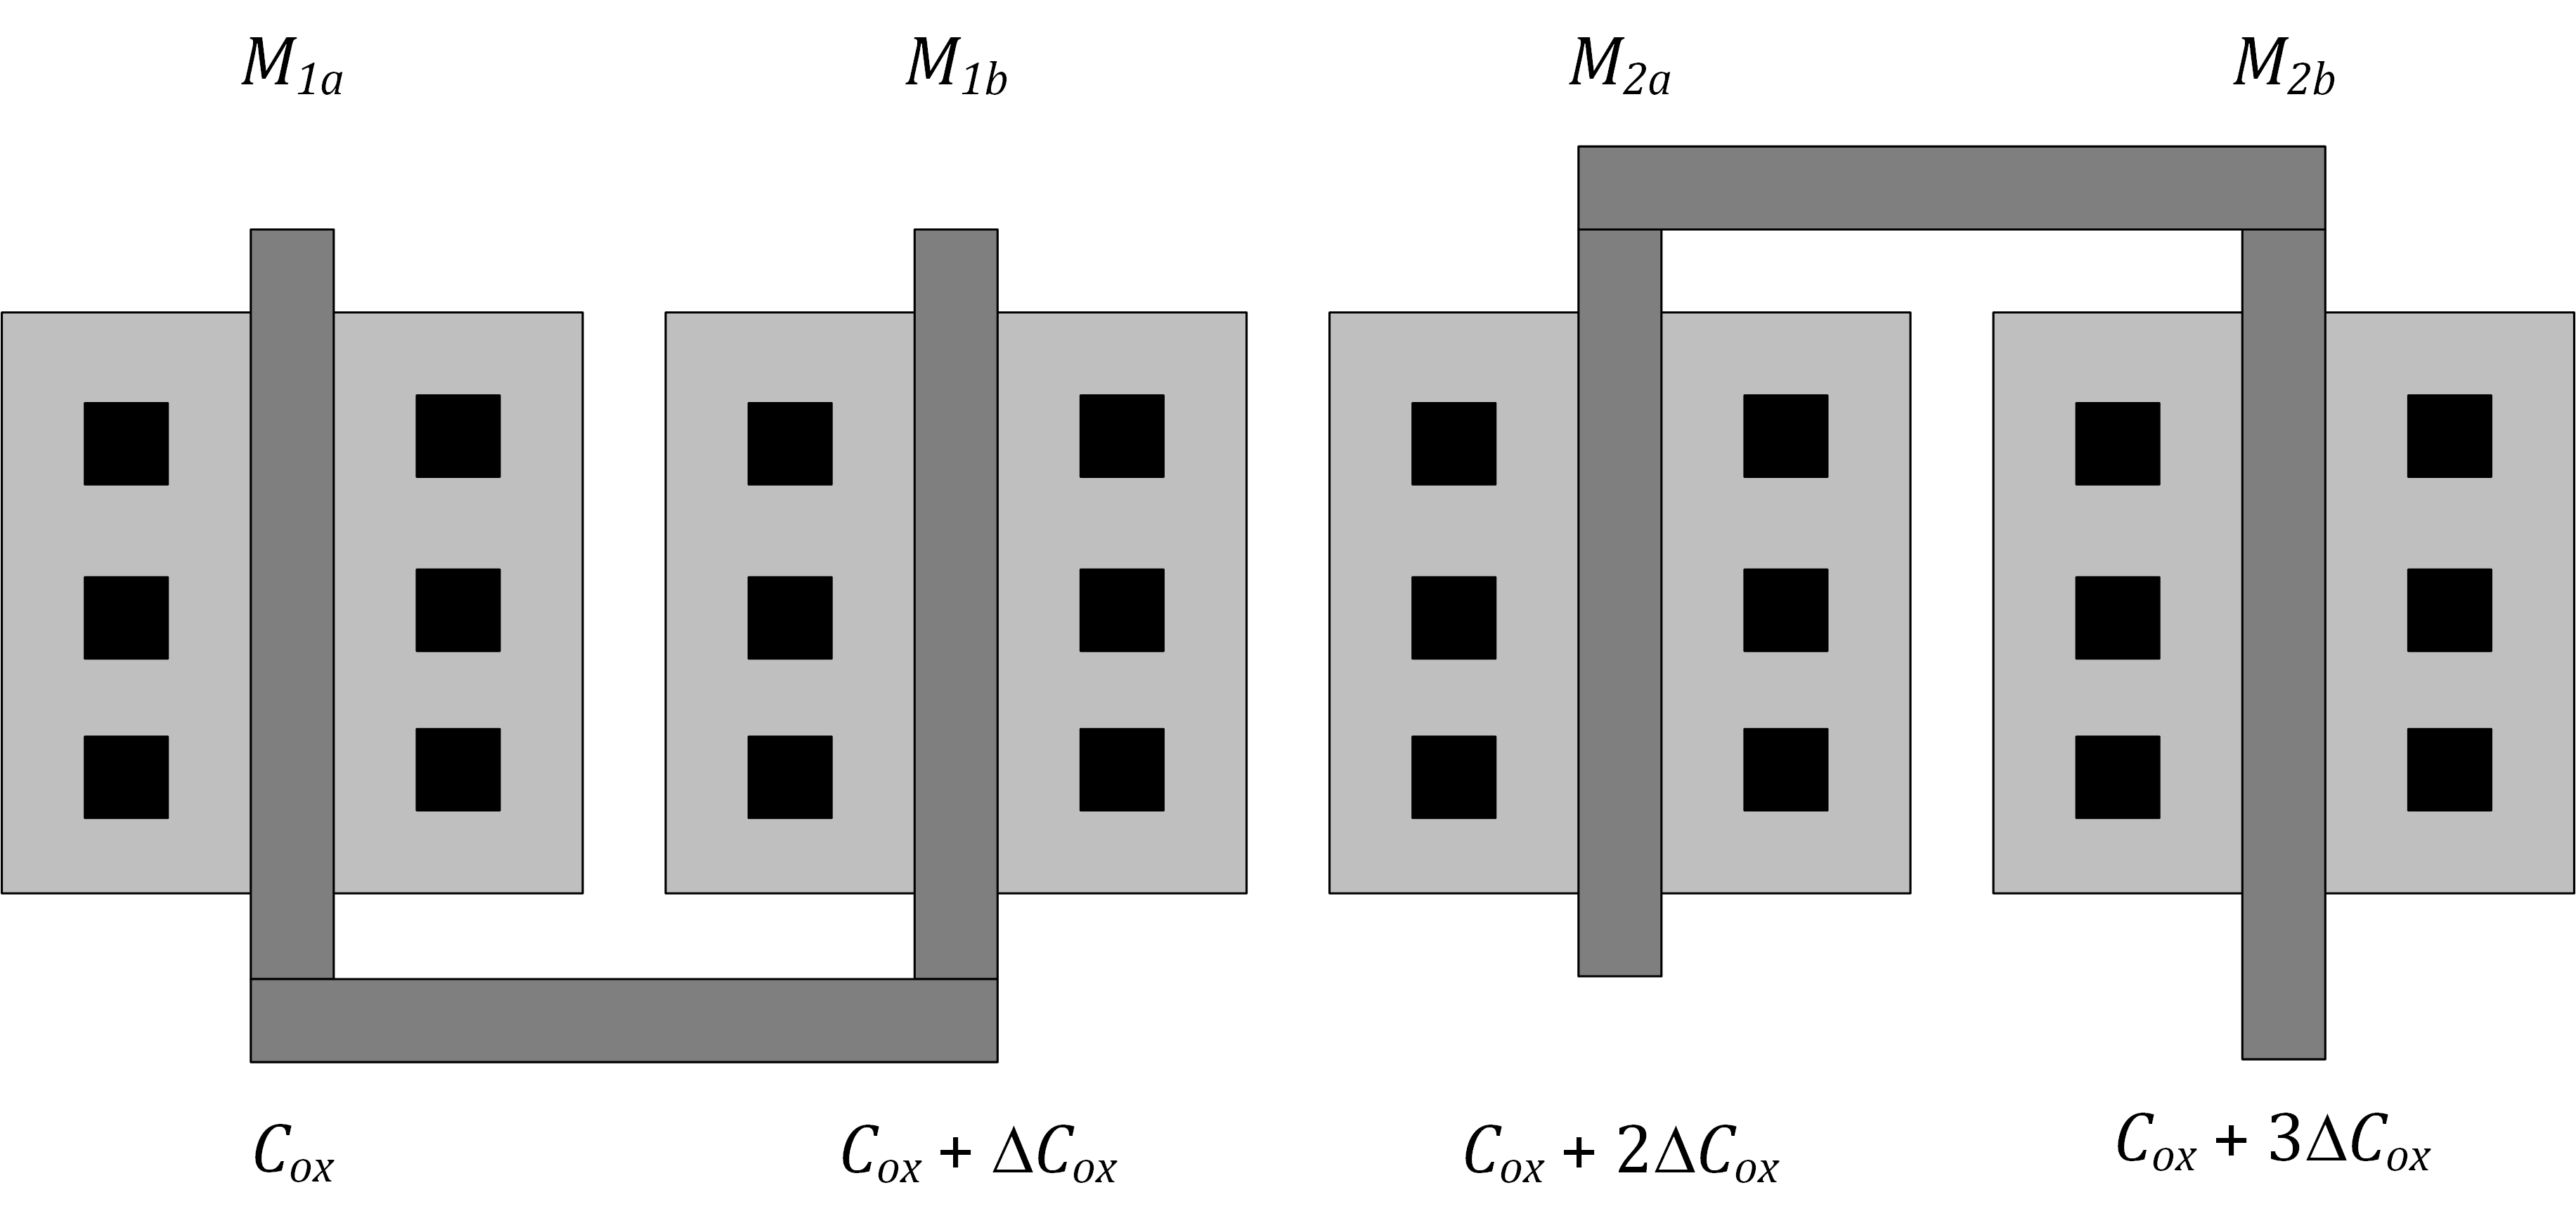

\begin{align}
C_{ox1} &= C_{ox} + C_{ox} + \Delta C_{ox} \\
&= \boxed{ 2C_{ox} + \Delta C_{ox} }\\
\end{align}

\begin{align}
C_{ox2} &= C_{ox} + 2 \Delta C_{ox} +  C_{ox} + 3 \Delta C_{ox} \\
&= \boxed{ 2C_{ox} + 5 \Delta C_{ox} }
\end{align}

  - In addition to random mismatch (due to local variations in material parameters), systematic variations in process parameters (e.g. doping concentration, oxide thickness, etc.) also arise
  
  - Such variations give rise to mismatch between nominally identical devices, particularly those located far from each other on chip 

## Common-centroid layout

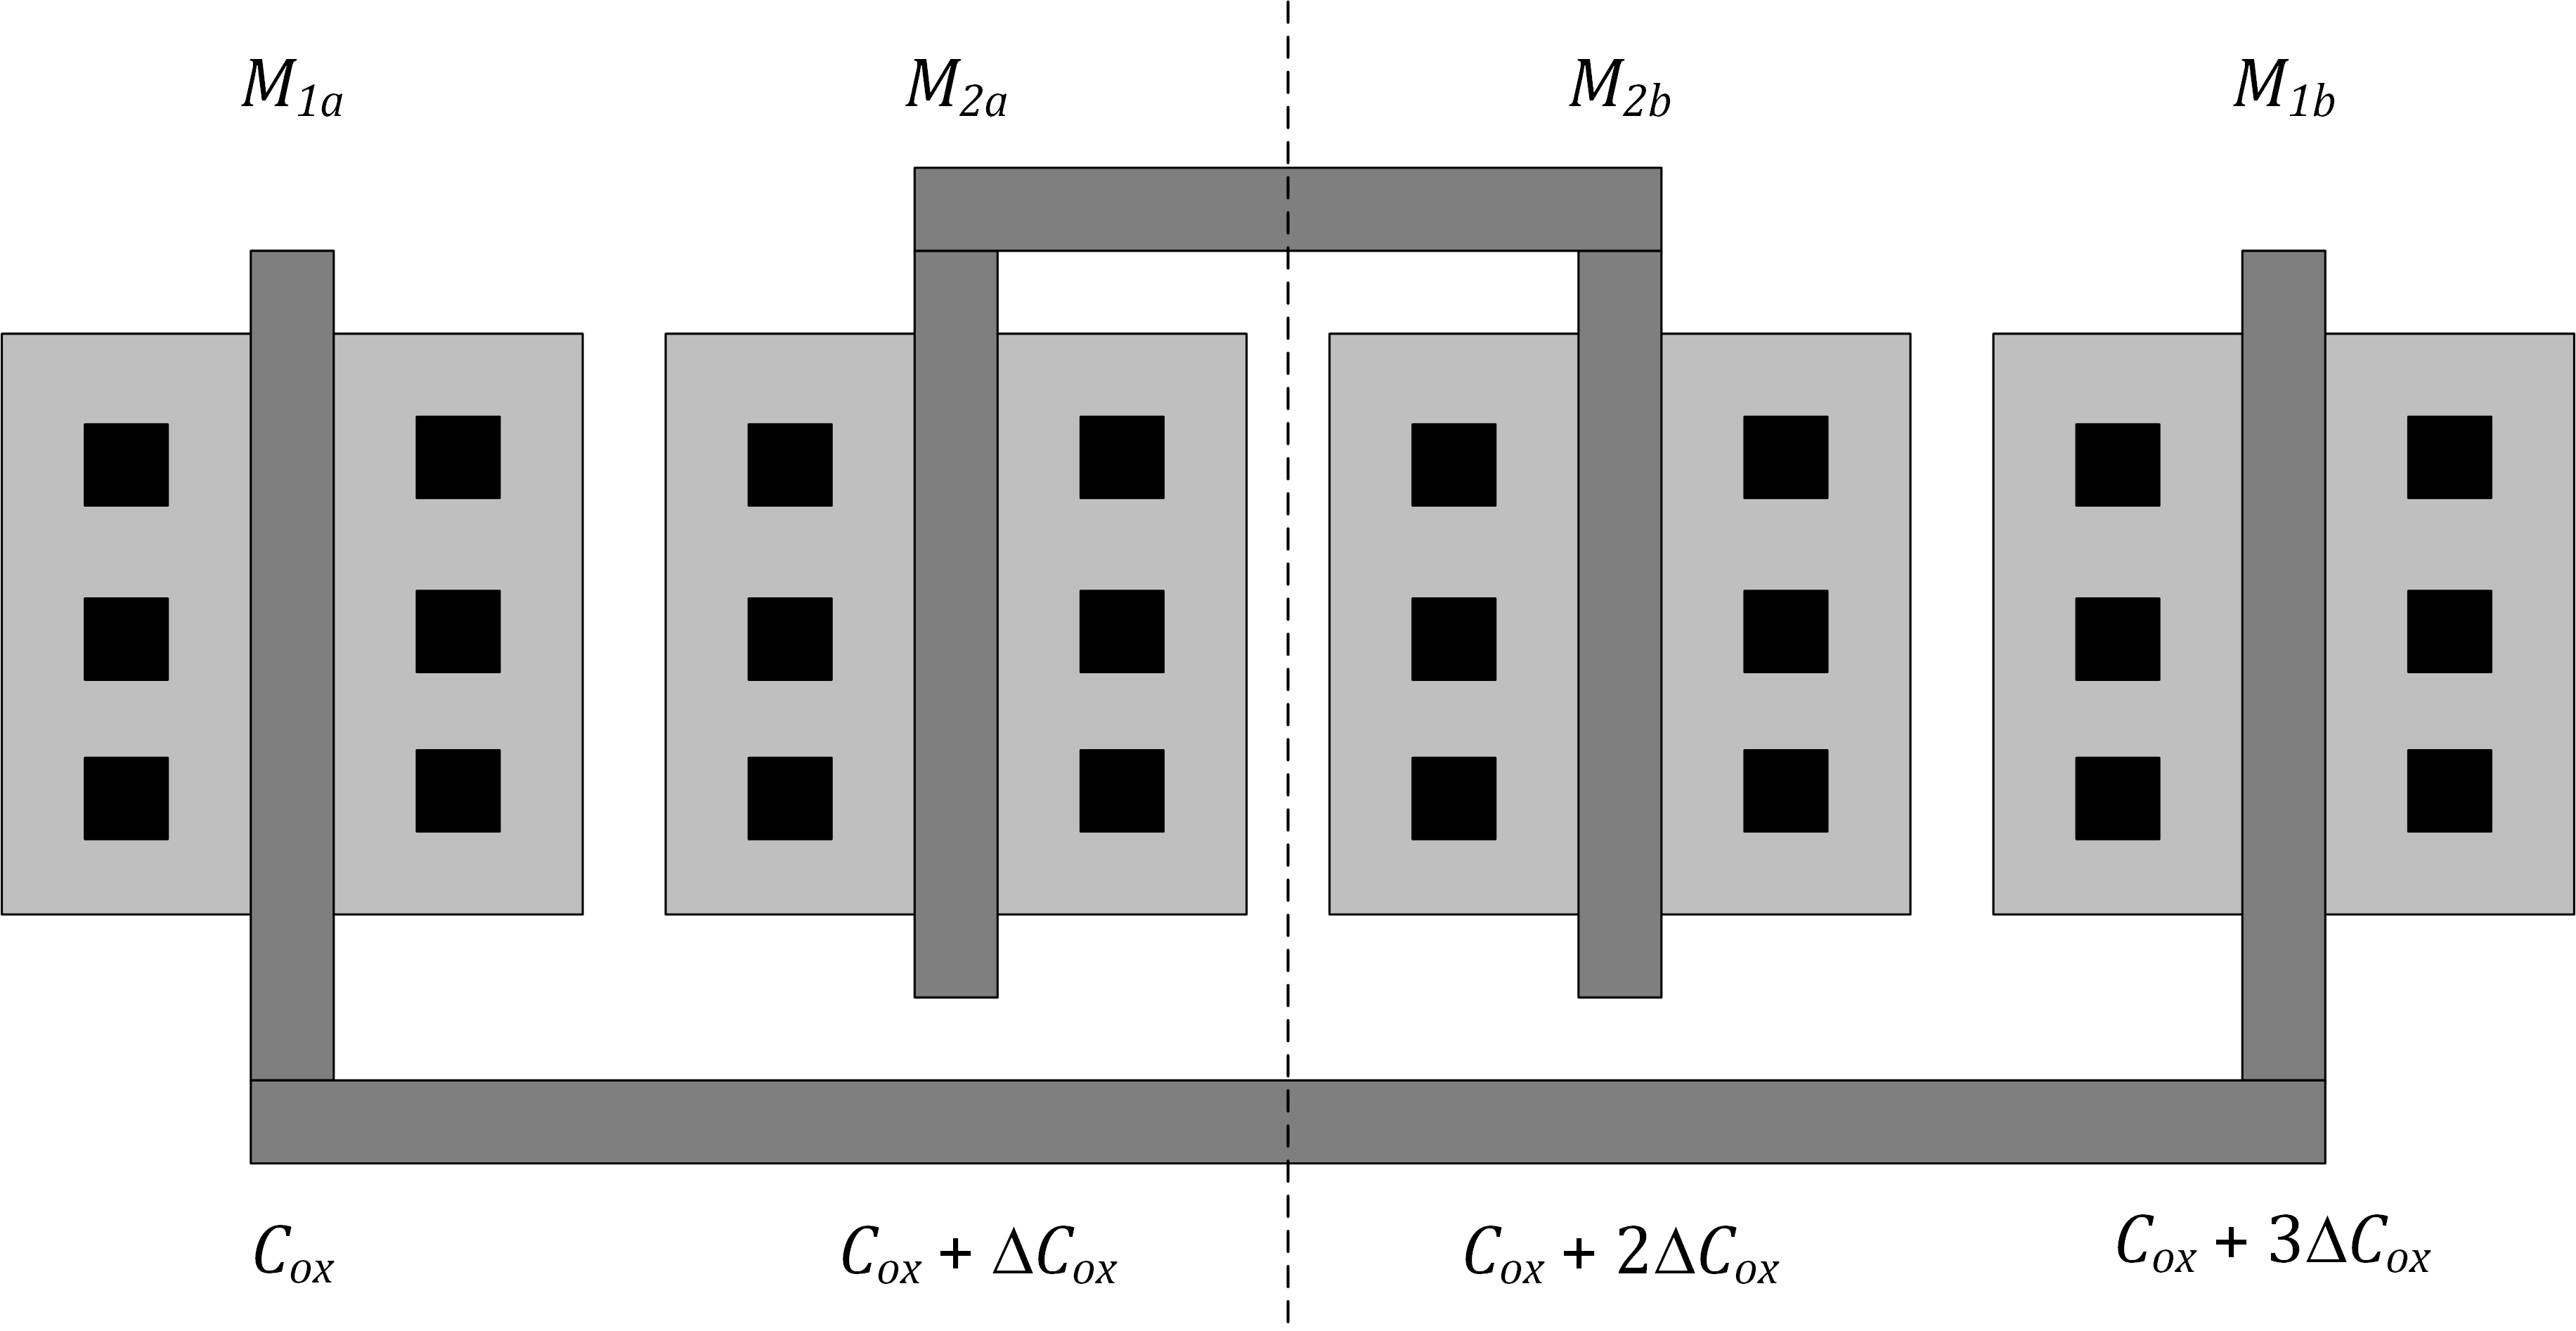

\begin{align}
C_{ox1} &= C_{ox} + C_{ox} + 3\Delta C_{ox} \\
&= \boxed{ 2C_{ox} + 3\Delta C_{ox} }\\
\end{align}

\begin{align}
C_{ox2} &= C_{ox} + \Delta C_{ox} +  C_{ox} + 2 \Delta C_{ox} \\
&= \boxed{ 2C_{ox} + 3 \Delta C_{ox} }
\end{align}

 - Common-centroid layout results in each transistor “seeing” the same net effect of linear process gradients
 
 - By ensuring matched devices are placed about an axis of symmetry, both devices experience the same average value of critical parameters

## Dummy transistors

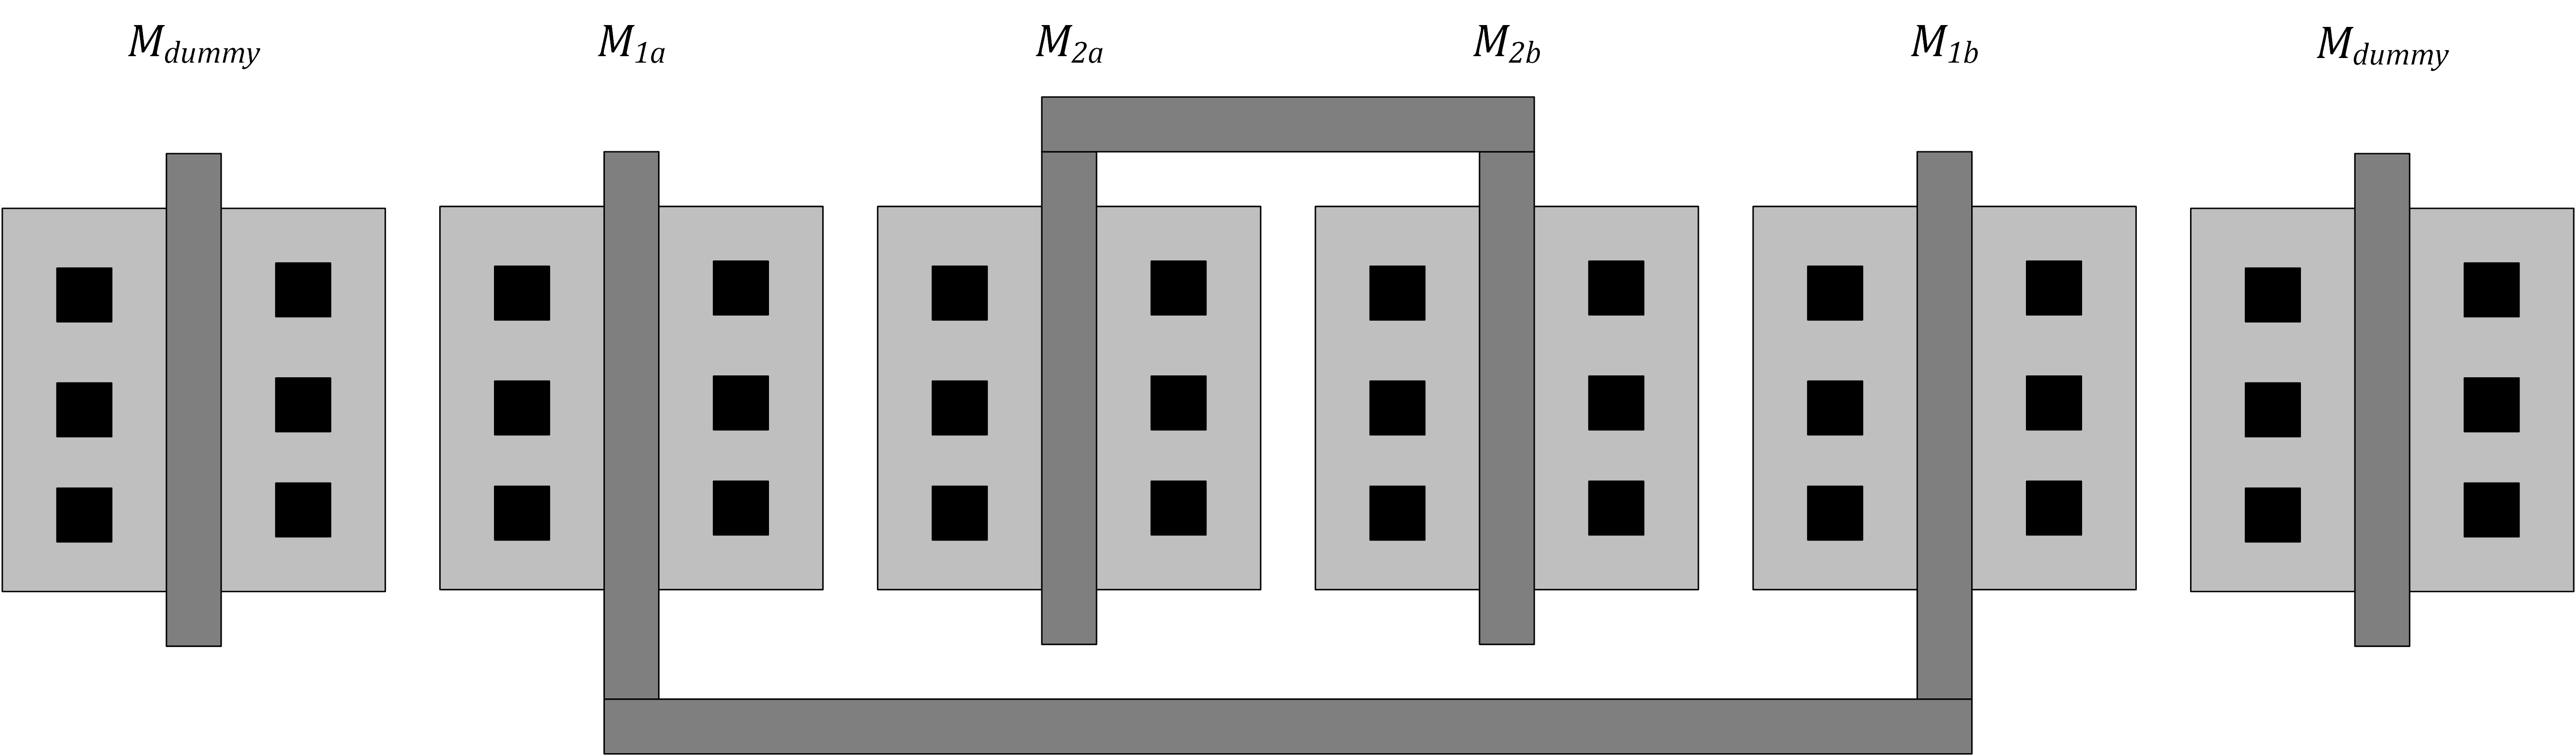

 - The addition of “dummy” transistors on either side of the devices to be matched further increases the symmetry of the environment seen by $M_{1,2}$
 
 - In this configuration implant shadowing results in the same drain/source asymmetry for both transistors, improving their matching

## Common-centroid (2D)

 - The common-centroid technique can also be applied in 2 dimensions
 
 - 2D common centroid layout provides robustness against linear process gradients in both $x$ and $y$
 
 - As an example, the matching of $pnp$ transistors is critical to the performance of a bandgap reference
 
 - Using an emitter area ratio of $N=8$ results in reasonable bias current and resistor values ($V_T \cdot \ln 8 \approx 52 mV$), and lends itself well to a 2D common-centroid layout


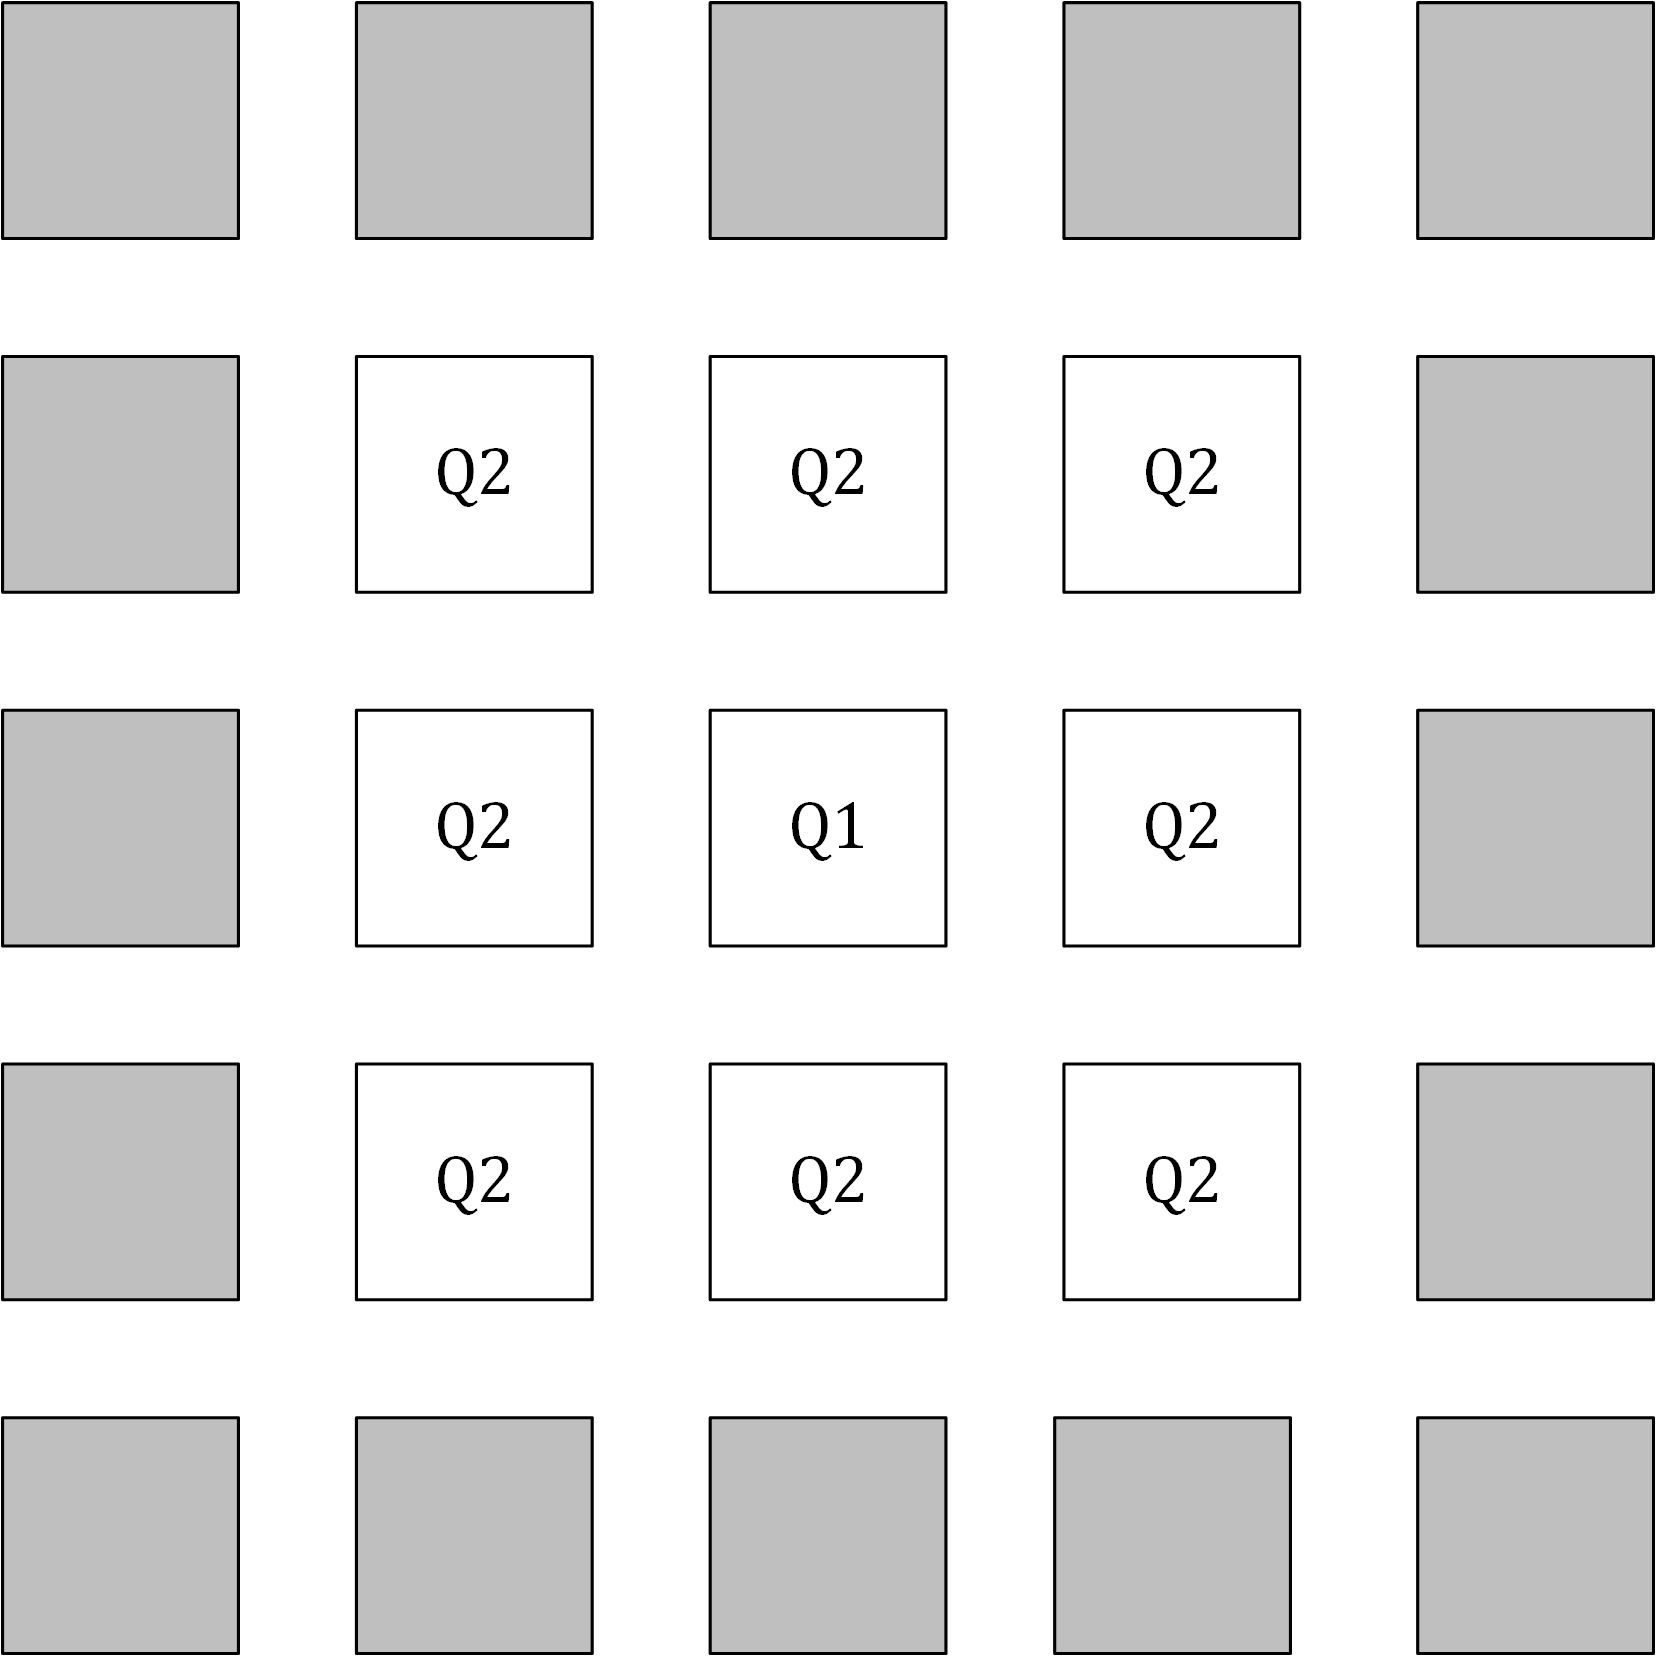

## Substrate noise

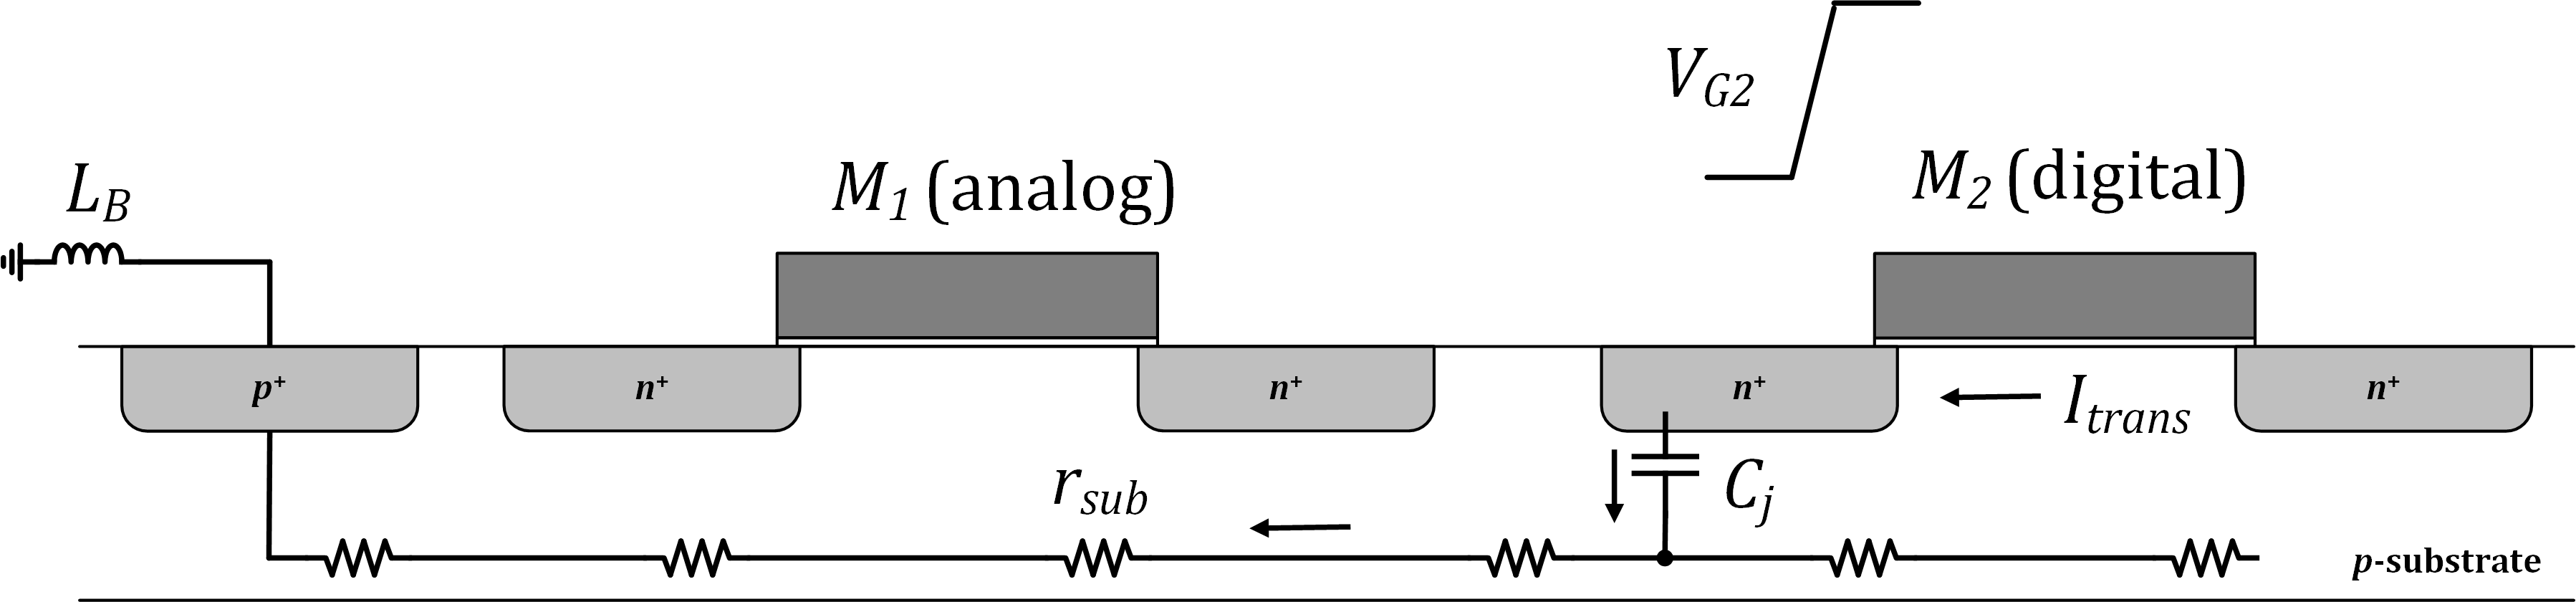

 - Transient currents in digital CMOS circuits can couple to the substrate through S/D junction capacitance to bulk
 
 - This current results in a voltage drop due to finite substrate resistance $r_{sub}$ 
 
 - Even if $r_{sub}$ is very small, the finite impedance of bond-wire inductance ($L_B$) will cause a change in the substrate potential, resulting in a noise current in $M_1$ due to the body effect


## Guard rings

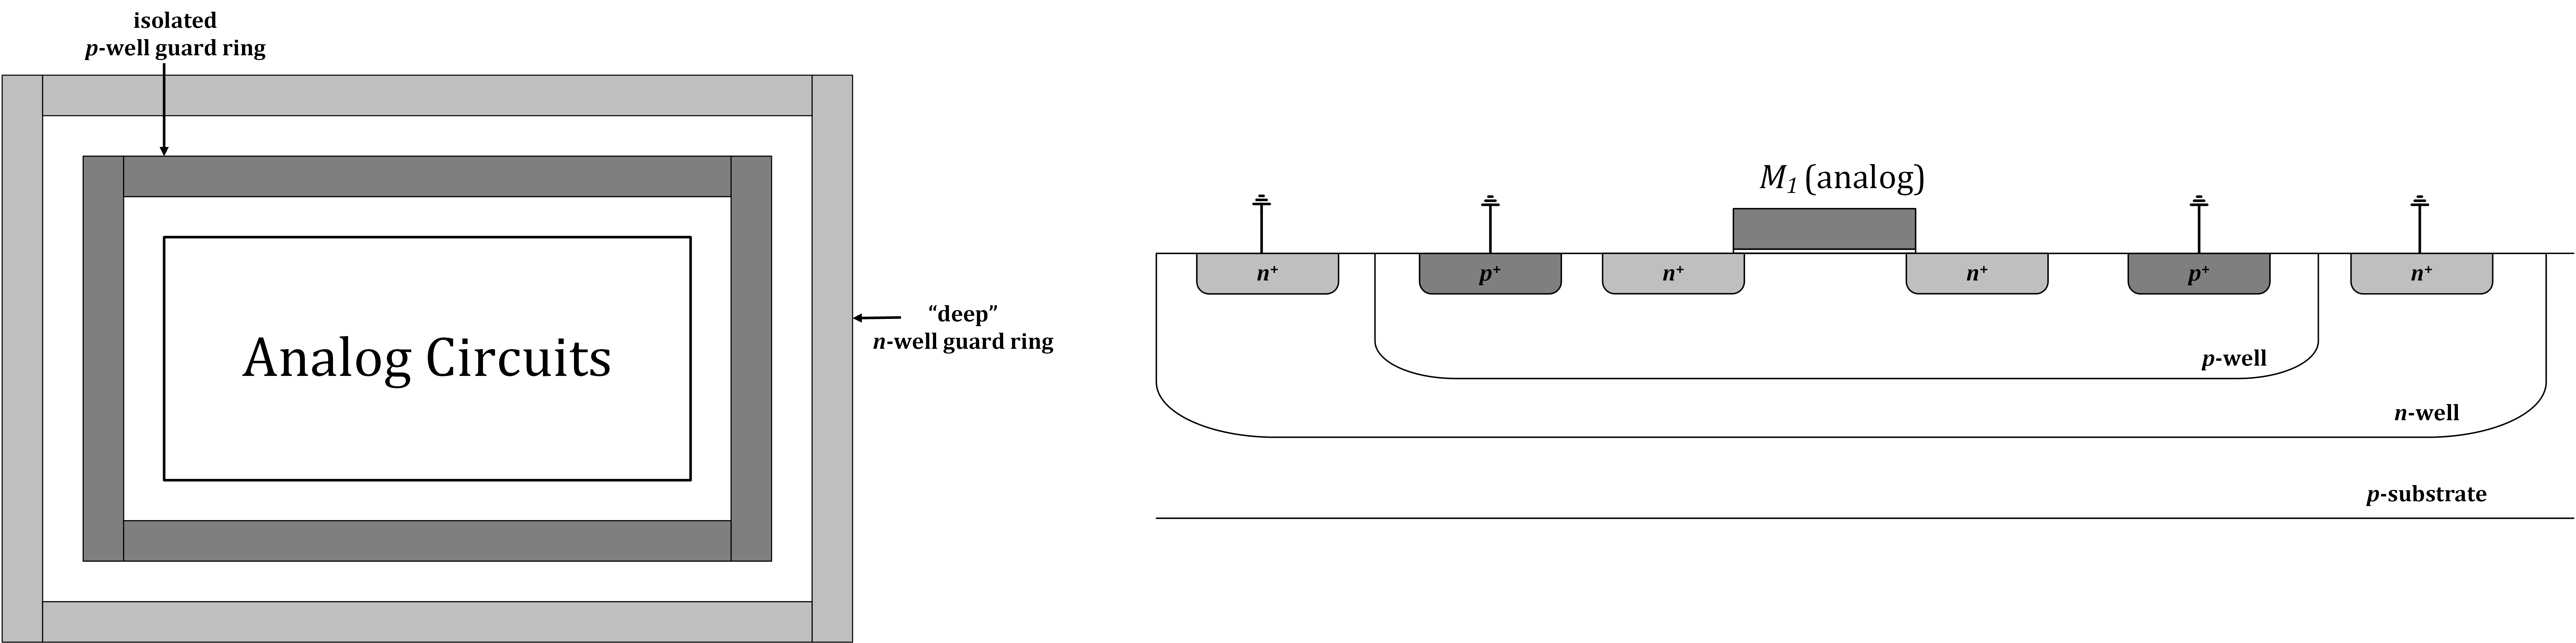

 - Guard rings provide a low-impedance path to ground for current flowing through the substrate, increasing isolation for sensitive analog circuits
 
 - Deep $n$-wells provide an added degree of isolation, at the expense of increased circuit area

## Summary

 - To ensure reliable design performance, layout of transistors and circuit blocks should adhere to manufacturing design rules

 - Multi-finger transistor layout is used to realize reasonable form factors for circuit blocks and to reduce gate resistance (at the expense of increases parasitic capacitance)
 
 - Common-centroid layout and the use of dummy transistors ensures a uniform environment for matched devices and improves matching of device characteristics
 
 - Guard rings and deep $n$-wells should be used to isolate sensitive analog circuits from substrate noise